# Entregable 1: Data Engineering by Anna de Gea

**Enunciado del entregable**: Con el fichero de BMW, el objetivo es _predecir el precio del vehículo_, para ello en este primer entregable se necesitará realizar todo el data cleaning y data preprocessing de los datos (ojo que si bien el objetivo es predecir el precio no será necesario hacer la predicción)

**Forma de entrega**:
Se debe entregar lo siguiente:
- Programa: en este programa debe estar todo el proceso de limpieza y preprocesamiento del dataset, tanto código, comentarios como también el output de cada paso, este programa se debe subir al campus

**Criterios de evaluación**:
- Limpieza de programa  (que no haya errores, que haya comentarios y el programa sea legible) 25%
- Limpieza de datos 25%
- Nuevas variables creadas 25%
- Preprocesamiento 25%

# 0. Inicio el programa (importar librerías y leer fichero)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
df_bmw = pd.read_csv("/Users/anna/Documents/MFIN/ MFIN - NUCLIO/Clases/Entregables/1. Data Engineering/bmw_pricing_v2.csv")

# 1. Exploratory Data Analysis

## 1.1. EDA (visión general)

*Con las siguientes funciones entiendo el dataset y concluyo como visión general de éste que:*

1. Se trata de un dataset de registros de ventas en el año 2018 entre los meses enero a septiembre, ambos incluidos, de coches de marca BMW. 
2. En el dataset hay 18 columnas y entre ellas, inicialmente, 1 contiene datos de tipo booleano, 3 datos numéricos y 14 datos categóricos
3. En el dataset hay 4843 registros y __ninguno duplicado__
4. De las 18 columnas, __17 de ellas continen valores nulos pero en todas ellas el total de nulos es 0.25% o menos del total de registros.__ Se nos dió en clase la indicación de "si los nulos representan 10% o más de los registros tenemos que abordarlo". Aún no cumpliendose esta indicación para ninguna de las columnas, decido hacer tratamiento de los nulos de todas las columnas y no borrar directamente todos los nulos para hacer más rico el ejercicio.

### 1.1.1. Exploración inicial datos
*(ver conclusión 1.)*

In [3]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [4]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [5]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [6]:
df_bmw.describe(include="all")

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
count,4841,4840,4.841000e+03,4842.000000,4842,4838,4831,4834,4839,4841,4841,4839,4841,4839,4843,4841,4837.000000,4842
unique,1,76,NaN,NaN,199,5,10,8,2,2,2,2,2,2,2,2,NaN,13
top,BMW,320,NaN,NaN,2013-07-01,diesel,black,estate,True,True,False,False,False,False,True,True,NaN,2018-05-01
freq,4841,752,NaN,NaN,173,4631,1632,1604,2662,3837,3864,3877,2612,3670,4514,2618,NaN,809
mean,NaN,NaN,1.409593e+05,128.981826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15831.920612,NaN
std,NaN,NaN,6.020853e+04,38.994839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9222.630708,NaN
min,NaN,NaN,-6.400000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN
25%,NaN,NaN,1.028840e+05,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10800.000000,NaN
50%,NaN,NaN,1.410800e+05,120.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14200.000000,NaN
75%,NaN,NaN,1.752170e+05,135.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18600.000000,NaN


### 1.1.2. Exploración inicial duplicados
*(ver conclusión 2.)*

In [7]:
len(df_bmw[df_bmw.duplicated()])

0

### 1.1.3. Exploración inicial nulos
*(ver conclusión 3.)*

In [8]:
df_bmw.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [9]:
bmw_totalnulls = df_bmw.isnull().sum()

In [10]:
df_bmw_totalnulls = pd.DataFrame({"Columna":bmw_totalnulls.index, "Nulos":bmw_totalnulls.values, "% Nulos sobre total":bmw_totalnulls.values/len(df_bmw)})

In [11]:
df_bmw_totalnulls["% Nulos sobre total"] = df_bmw_totalnulls["% Nulos sobre total"].apply(lambda x: "{:.2%}".format(x))

In [12]:
df_bmw_totalnulls

,Columna,Nulos,% Nulos sobre total
0,marca,2,0.04%
1,modelo,3,0.06%
2,km,2,0.04%
3,potencia,1,0.02%
4,fecha_registro,1,0.02%
5,tipo_gasolina,5,0.10%
6,color,12,0.25%
7,tipo_coche,9,0.19%
8,volante_regulable,4,0.08%
9,aire_acondicionado,2,0.04%


## 1.2. EDA (análisis columnas numéricas)

### 1.2.1. Análisis columna "km"

Para esta columna hay 4 registros que debo tratar:
- 2 nulos
- 1 valor negativo
- 1 upper outlier

__CONCLUSIÓN: Decido BORRAR los 4 registros ya que:__
- la variable km no tiene relación con el resto de variables para que pueda rellenar los nulos/negativos/outliers con una media correlacionada con registros similares (más allá de la fecha_registro pero no aporta tanta información)
-  Existen más registros con el mismo modelo que representan estos 4 registros así que no se perderá información tan valiosa

*(ver más detalle de las conclusiones en 1.2.1.1. y 1.2.1.2)*

In [13]:
df_bmw[(df_bmw["km"].isnull()) | (df_bmw["km"]<0) | (df_bmw["km"]>1000000)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,BMW,520,NaN,135.0,2012-12-01,diesel,black,estate,True,True,True,False,True,True,True,True,20300.0,2018-02-01
2938,BMW,640 Gran Coupé,-64.0,230.0,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,2018-04-01
3732,BMW,118,1000376.0,90.0,2005-03-01,diesel,black,subcompact,True,False,False,False,False,False,True,False,1400.0,2018-06-01
4811,BMW,X3,NaN,190.0,2013-11-01,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01


#### 1.2.1.1. Revisión de los outliers:
- Primero a través de calcular los upper y lower outliers
- Segundo a través de revisar visualmente su histograma


Conclusiones_outliers:
- Lower Outlier, no hay ningún registro por debajo de este valor, aunque sí hay un registro (nº2938) con valor negativo en km (-64)
- Upper Outlier, aunque existen 97 registros que superan este valor, decido no tratarlos como outliers porque parecen valores razonables menores a 500.000km, menos __1 registro (nº3732) con valor muy por encima (1.000.376 km) que sí trataré como upper outlier__

In [14]:
Q1_km = df_bmw["km"].quantile(0.25)
Q3_km = df_bmw["km"].quantile(0.75)
UpperOutlier_km = Q3_km + 1.5 * (Q3_km - Q1_km)
LowerOutlier_km = Q1_km - 1.5 * (Q3_km - Q1_km)
print(LowerOutlier_km)
print(UpperOutlier_km)

-5615.5
283716.5


array([[<Axes: title={'center': 'km'}>]], dtype=object)

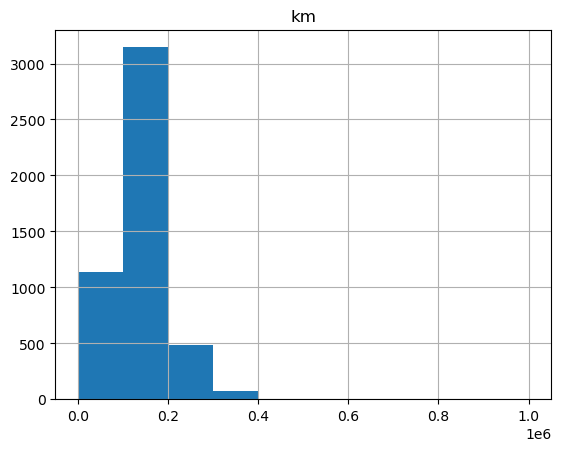

In [15]:
df_bmw.hist("km")

In [16]:
print(df_bmw["km"].max())
print(df_bmw["km"].mean().round())
print(df_bmw["km"].min())

1000376.0
140959.0
-64.0


In [17]:
df_bmw[df_bmw["km"]<0]


,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,BMW,640 Gran Coupé,-64.0,230.0,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,2018-04-01


In [18]:
df_bmw[df_bmw["km"]>UpperOutlier_km]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
56,BMW,320,329173.0,110.0,2004-07-01,diesel,silver,coupe,True,False,False,False,False,NaN,True,True,2300.0,2018-08-01
100,BMW,320,342768.0,135.0,2011-12-01,diesel,black,coupe,False,True,False,False,True,False,True,False,8200.0,2010-04-01
179,BMW,320,302525.0,100.0,2001-01-01,diesel,grey,estate,False,False,False,False,False,False,True,False,1000.0,2018-09-01
262,BMW,318,319724.0,90.0,2006-09-01,diesel,grey,estate,True,False,False,False,False,False,True,False,3000.0,2018-01-01
450,BMW,525,316855.0,150.0,2010-12-01,diesel,black,estate,True,True,True,False,True,False,True,False,9400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609,BMW,X1,290306.0,105.0,2014-03-01,diesel,white,suv,True,True,False,False,True,False,True,True,14000.0,2018-07-01
4618,BMW,X6,295953.0,225.0,2011-10-01,diesel,black,suv,True,True,True,True,True,False,True,True,22000.0,2018-07-01
4643,BMW,X6,296257.0,225.0,2011-10-01,diesel,black,suv,True,True,True,True,True,False,True,True,22000.0,2018-08-01
4724,BMW,X5,364547.0,261.0,2007-06-01,petrol,black,suv,True,True,True,False,True,False,True,True,11300.0,2018-08-01


In [19]:
df_bmw[df_bmw["km"]>400000]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
557,BMW,520,484615.0,120.0,2011-02-01,diesel,blue,estate,True,True,False,False,False,False,True,False,8300.0,2018-03-01
1573,BMW,320,400654.0,110.0,2006-12-01,diesel,black,estate,False,False,True,False,False,False,True,False,1800.0,2018-07-01
2350,BMW,318,477571.0,85.0,2004-09-01,diesel,grey,hatchback,False,True,False,False,False,True,False,False,1200.0,2018-07-01
2829,BMW,525,439060.0,105.0,1996-10-01,diesel,silver,sedan,False,False,True,False,False,False,True,False,100.0,2018-03-01
3198,BMW,320,405816.0,100.0,2000-02-01,diesel,blue,sedan,False,False,False,False,False,False,True,False,500.0,2018-05-01
3732,BMW,118,1000376.0,90.0,2005-03-01,diesel,black,subcompact,True,False,False,False,False,False,True,False,1400.0,2018-06-01


#### 1.2.1.2. Exploración más a detalle de los 4 registros a tratar:
- Veo que hay 76 modelos distintos, reviso si los 4 registros a tratar son de un modelo único o existen más registros con ese modelo. Se observa el segundo caso, los 4 registros representan un modelo de coche que en la muestra está representado por más de 1 coche/registro, así que si se borran estos registros no se perderá información tan valiosa.

In [20]:
df_bmw["modelo"].value_counts()

320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64

In [21]:
len(df_bmw[df_bmw["modelo"]=="520"])

633

In [22]:
len(df_bmw[df_bmw["modelo"]=="640 Gran Coupé"])

19

In [23]:
len(df_bmw[df_bmw["modelo"]=="X3"])

438

In [24]:
len(df_bmw[df_bmw["modelo"]=="118"])

143

### 1.2.2. Análisis columna "potencia"

Para esta columna hay 4 registros que debo tratar:
- 1 nulo
- 3 lower outliers (1 con valor 0, y 2 con valor 25)
- *no considero ningún valor upper outlier porque el valor 423 máximo es posible dentro del concepto "potencia"*

__CONCLUSIÓN: Decido no borrar los registros, sino asignarles un valor correspondiente a la media de potencia de los registros con el mismo modelo__

In [25]:
df_bmw[(df_bmw["potencia"].isnull())| (df_bmw["potencia"]<50)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,BMW,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,False,False,False,True,True,18700.0,2018-03-01
1796,BMW,i3,152328.0,25.0,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300.0,2018-04-01
1925,BMW,i3,152470.0,25.0,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,2018-03-01
3765,BMW,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,False,11700.0,2018-03-01


#### 1.2.2.1. Revisión de los outliers:
- Primero a través de calcular los upper y lower outliers
- Segundo a través de revisar visualmente su histograma


Conclusiones_outliers:
- Lower Outlier, hay 3 registros por debajo que deberemos tratar
- Upper Outlier, aunque existen 588 registros que superan este valor (entre 189 y 423), decido no tratarlos como outliers porque son valores posibles dentro del concepto potencia

In [26]:
Q1_potencia = df_bmw["potencia"].quantile(0.25)
Q3_potencia = df_bmw["potencia"].quantile(0.75)
UpperOutlier_potencia = Q3_potencia + 1.5 * (Q3_potencia - Q1_potencia)
LowerOutlier_potencia = Q1_potencia - 1.5 * (Q3_potencia - Q1_potencia)
print(LowerOutlier_potencia)
print(UpperOutlier_potencia)

47.5
187.5


array([[<Axes: title={'center': 'potencia'}>]], dtype=object)

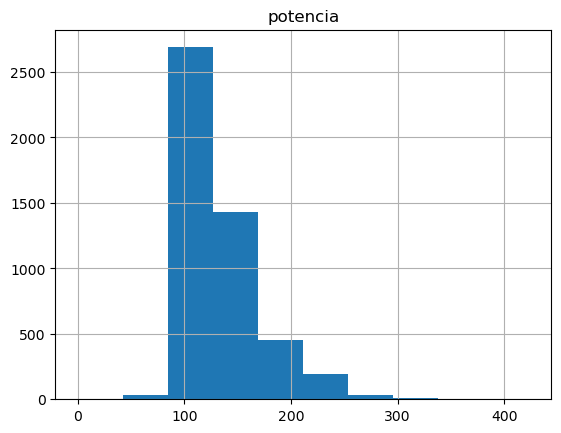

In [27]:
df_bmw.hist("potencia")

In [28]:
print(df_bmw["potencia"].max())
print(df_bmw["potencia"].mean().round())
print(df_bmw["potencia"].min())

423.0
129.0
0.0


In [29]:
df_bmw[df_bmw["potencia"]>UpperOutlier_potencia].sort_values(by="potencia")

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1010,BMW,530,157626.0,189.0,2012-06-01,diesel,grey,estate,True,True,False,False,True,False,True,True,9500.0,2018-04-01
3561,BMW,530,195056.0,189.0,2013-08-01,diesel,grey,sedan,True,True,False,False,False,False,True,True,19600.0,2018-08-01
3116,BMW,730,115129.0,190.0,2014-02-01,diesel,blue,sedan,True,True,False,False,True,False,True,True,25000.0,2018-05-01
3824,BMW,X5,45872.0,190.0,2015-01-01,diesel,brown,suv,True,True,True,True,False,False,True,True,43700.0,2018-01-01
3813,BMW,X3,181874.0,190.0,2014-01-01,diesel,black,suv,True,True,True,True,True,True,True,True,21500.0,2018-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,BMW,M3,33670.0,317.0,2014-03-01,petrol,blue,sedan,True,True,False,False,False,True,True,True,51200.0,2018-04-01
72,BMW,M4,69410.0,317.0,2015-02-01,petrol,white,coupe,True,True,False,False,False,True,True,True,53600.0,2018-03-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
3601,BMW,M5,150187.0,412.0,2012-02-01,petrol,white,sedan,True,True,True,False,True,True,True,True,41600.0,2018-09-01


#### 1.2.2.2. Exploración más a detalle de los 4 registros a tratar:
- Los 4 registros a tratar representan los modelos 525, x1 y i3 (2 registros), se decide calcular el valor medio de potencia de los registros con el mismo modelo para asignárselo a los 4 registros. 

In [30]:
media_potencia_x1 = df_bmw[df_bmw["modelo"]=="X1"]["potencia"].mean()

In [31]:
media_potencia_i3 = df_bmw[(df_bmw["modelo"]=="i3") & (df_bmw["potencia"]>25)]["potencia"].mean()

In [32]:
media_potencia_525 = df_bmw[df_bmw["modelo"]=="525"]["potencia"].mean()

### 1.2.3. Análisis columna "precio"

Para esta columna, que es la columna target, hay 12 registros que debo tratar:
- 6 nulos
- 6 lower outliers (con valor precio venta 100 euros y con menos de 5 años de antiguedad)
- *no considero ningún valor upper outlier porque los dos registros con valor superior a 100k son de un modelo x3/x4 y tipo suv considerados de lujo, por lo que son valores posible dentro del concepto "precio"*

__CONCLUSIÓN: Decido borrar los 12 registros ya que esta columna es el "target"__

#### 1.2.3.1. Revisión de los outliers:
- Primero a través de calcular los upper y lower outliers
- Segundo a través de revisar visualmente su histograma


Conclusiones_outliers:
- Lower Outlier, aunque no hay ningún registro por debajo de este valor (-900€), sí hay registros con valor precio muy bajo (menor a 500€) que se deciden explorar. Se hace un análisis cruzado observando la fecha_registro y se consideran 6 valores lower ouliers incorrectos pues tienen un precio de 100€ y son relativamente nuevos (menos de 5 años de antiguedad). __Se decide borrar estos 6 registros__
- Upper Outlier, aunque existen 311 registros que superan este valor (30.300€), no considero ningún valor upper outlier porque parecen valores razonables menores a 100.000€, incluso los dos registros con valor superior a 100.000€ se observa que son de un modelo x3/x4 y tipo suv considerados de lujo, por lo que son valores posible dentro del concepto "precio"

In [33]:
Q1_precio = df_bmw["precio"].quantile(0.25)
Q3_precio = df_bmw["precio"].quantile(0.75)
UpperOutlier_precio = Q3_precio + 1.5 * (Q3_precio - Q1_precio)
LowerOutlier_precio = Q1_precio - 1.5 * (Q3_precio - Q1_precio)
print(LowerOutlier_precio)
print(UpperOutlier_precio)

-900.0
30300.0


<Axes: >

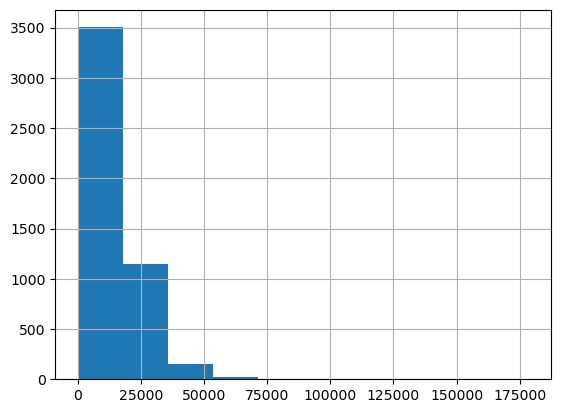

In [34]:
df_bmw["precio"].hist()

In [35]:
print(df_bmw["precio"].min())
print(df_bmw["precio"].mean().round())
print(df_bmw["precio"].max())

100.0
15832.0
178500.0


In [36]:
df_bmw[df_bmw["precio"]>UpperOutlier_precio].sort_values(by="precio")

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4142,BMW,X4,103064.0,140.0,2015-01-01,diesel,grey,suv,True,True,False,False,False,False,True,True,30500.0,2018-06-01
60,BMW,435,26062.0,225.0,2015-02-01,petrol,blue,coupe,True,True,False,True,True,True,True,True,30500.0,2018-03-01
4267,BMW,X5,100943.0,190.0,2014-06-01,diesel,grey,suv,False,True,True,False,False,False,False,True,30500.0,2018-05-01
3919,BMW,X5,76677.0,190.0,2013-11-01,diesel,black,suv,True,True,False,True,True,False,True,True,30500.0,2018-02-01
4028,BMW,X5,168160.0,160.0,2014-03-01,diesel,grey,suv,True,True,False,True,True,False,True,True,30600.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,BMW,640 Gran Coupé,-64.0,230.0,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,2018-04-01
4146,BMW,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,True,True,False,False,False,True,True,82400.0,2018-04-01
90,BMW,i8,12402.0,170.0,2016-01-01,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
4684,BMW,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,False,True,False,True,True,142800.0,2018-08-01


In [37]:
df_bmw_fechas = df_bmw.copy()

In [38]:
df_bmw_fechas["fecha_registro"] = pd.to_datetime(df_bmw_fechas["fecha_registro"])

In [39]:
df_bmw_fechas[(df_bmw_fechas["precio"]<500) & (df_bmw_fechas["fecha_registro"]<"2001-01-01")].sort_values(by="precio")

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2829,BMW,525,439060.0,105.0,1996-10-01,diesel,silver,sedan,False,False,True,False,False,False,True,False,100.0,2018-03-01
2473,BMW,525,230578.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2574,BMW,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2611,BMW,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
1513,BMW,520,358332.0,100.0,2000-10-01,diesel,blue,estate,False,False,False,False,True,False,True,False,400.0,2018-07-01
1558,BMW,520,358333.0,100.0,2000-10-01,diesel,blue,estate,False,False,False,False,True,False,True,False,400.0,2018-07-01
3062,BMW,318,98097.0,85.0,1994-01-01,petrol,blue,sedan,True,False,False,False,False,False,True,True,400.0,2018-04-01
3449,BMW,316,184233.0,77.0,1999-06-01,petrol,grey,sedan,False,False,False,False,False,False,True,False,400.0,2018-07-01
3575,BMW,316,359661.0,75.0,1997-09-01,petrol,grey,sedan,False,False,False,False,False,False,True,False,400.0,2018-08-01


In [40]:
df_bmw_fechas[(df_bmw_fechas["precio"]<500) & (df_bmw_fechas["fecha_registro"]>"2001-01-01")].sort_values(by="precio")

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
565,BMW,320,179358.0,120.0,2013-06-01,diesel,black,estate,False,True,False,False,False,False,True,True,100.0,2018-03-01
630,BMW,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,True,False,False,False,False,False,True,100.0,2018-03-01
879,BMW,318,134156.0,105.0,2014-06-01,diesel,grey,estate,False,True,False,False,False,False,False,True,100.0,2018-04-01
1255,BMW,320,170381.0,135.0,2013-07-01,diesel,silver,estate,True,True,False,False,False,False,True,False,100.0,2018-05-01
1832,BMW,116,174524.0,85.0,2014-07-01,diesel,blue,hatchback,False,True,False,False,False,False,True,True,100.0,2018-03-01
4356,BMW,X3,79685.0,190.0,2014-02-01,diesel,black,suv,False,False,False,False,False,False,False,True,100.0,2018-05-01


## 1.3. EDA (análisis columnas booleans)

No hay ningún nulo en la única columna booleana (sin tratar las categóricas que en realidad son booleanas), por lo que simplemente se observa la columna para ver que el 93,2% de los coches tienen GPS, y el 6.7% no tienen GPS

In [41]:
df_bmw["gps"].value_counts()

True     4514
False     329
Name: gps, dtype: int64

In [42]:
sin_gps = len(df_bmw[df_bmw["gps"]==False])/len(df_bmw)
con_gps = len(df_bmw[df_bmw["gps"]==True])/len(df_bmw)
print(sin_gps)
print(con_gps)

0.06793309931860417
0.9320669006813959


## 1.4. EDA (análisis columnas categóricas)

Primera exploración general a las columnas categóricas con el value_counts() para todas ellas:

In [43]:
target = ["precio"]

def obtener_lista_variables(dataset):
    lista_categoricas = []

    for i in dataset:
        if(dataset[i].dtype.kind=="O") and i not in target:
            lista_categoricas.append(i)

    return lista_categoricas

l_cat = obtener_lista_variables(df_bmw)

In [44]:
for i in l_cat:
    print(df_bmw.value_counts(i))

marca
BMW    4841
dtype: int64
modelo
320                  752
520                  633
318                  568
X3                   438
116                  358
                    ... 
225                    1
220 Active Tourer      1
216                    1
214 Gran Tourer        1
i8                     1
Length: 76, dtype: int64
fecha_registro
2013-07-01    173
2014-03-01    162
2014-05-01    153
2013-09-01    148
2013-01-01    148
             ... 
2002-09-01      1
2002-11-01      1
2004-11-01      1
2004-12-01      1
2017-11-01      1
Length: 199, dtype: int64
tipo_gasolina
diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
dtype: int64
color
black     1632
grey      1171
blue       707
white      537
brown      341
silver     327
red         51
beige       41
green       18
orange       6
dtype: int64
tipo_coche
estate         1604
sedan          1167
suv            1057
hatchback       699
subcompact      113
coupe 

### 1.4.1. Análisis columna "marca"

En la exploración general de las variables categóricas se observa que:
- Solo hay 1 valor "BMW"
- Hay 2 registros con valor nulo (esto observado en el apartado 1.1.3)

__CONCLUSION: Borrar la columna entera ya que no aporta información útil para el análisis y no ayuda a distinguir entre diferentes registros.__

### 1.4.2. Análisis columna "modelo"

En la exploración general de las variables categóricas se observa que:
- Hay 76 tipos de modelos distintos
- Hay 3 valores nulos

__CONCLUSIÓN: Se deciden borrar los nulos, y la columna "Modelo" se eliminará para dejar su contenido clasificado en 15 columnas:__
- Las 15 columnas nuevas serán:
    - 7 columnas referentes al número de Serie:  "Serie 1", "Serie 2", "Serie 3", "Serie 4", "Serie 5", "Serie 6" y "Serie 7"
    - 8 columnas referentes a la tipologia: "X" (para todoterreno), "M" (para motorsport), "i" (para eléctricos o hybrid), "Gran", "Active", "Tourer", "Turismo", "Coupé"
- Aunque haya modelos como el "320" o "520" muy populares, se decide generar nuevas columnas para los modelos ya que lo que importa es el número por el que empiezan y dentro de una misma serie (ej Serie 3 o Serie 5) el resto de números indican diferencias en potencia u otros que se pueden observar con la columna "potencia".
- *No se generará una columna "modelo_hybrid" porqué solo hay un registro con modelo "ActiveHybrid 5" y éste concepto ya queda reflejado en el tipo_gasolina_hybrid.*

In [45]:
df_bmw[df_bmw["modelo"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,BMW,NaN,146338.0,105.0,2014-01-01,diesel,black,estate,False,True,False,False,False,False,True,True,13300.0,2018-08-01
4766,BMW,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,True,True,False,True,False,14900.0,2018-09-01
4802,BMW,NaN,118640.0,110.0,2014-09-01,diesel,white,van,False,False,False,False,False,False,False,False,800.0,2018-03-01


*--> Primera exploración para ver qué modelos son más o menos populares:*

In [46]:
bmw_porcentajemodelos = df_bmw["modelo"].value_counts()
df_bmw_porcentajemodelos = pd.DataFrame({"Modelo":bmw_porcentajemodelos.index, "Nº registros":bmw_porcentajemodelos.values, "% Registros sobre total":bmw_porcentajemodelos.values/len(df_bmw)})
df_bmw_porcentajemodelos

,Modelo,Nº registros,% Registros sobre total
0,320,752,0.155276
1,520,633,0.130704
2,318,568,0.117283
3,X3,438,0.090440
4,116,358,0.073921
...,...,...,...
71,M135,1,0.000206
72,225,1,0.000206
73,i8,1,0.000206
74,630,1,0.000206


In [47]:
df_bmw_porcentajemodelos[df_bmw_porcentajemodelos["% Registros sobre total"]>=0.01]

,Modelo,Nº registros,% Registros sobre total
0,320,752,0.155276
1,520,633,0.130704
2,318,568,0.117283
3,X3,438,0.090440
4,116,358,0.073921
5,X1,274,0.056577
6,316,235,0.048524
7,X5,231,0.047698
8,525,184,0.037993
9,530,157,0.032418


In [48]:
df_bmw_porcentajemodelos[df_bmw_porcentajemodelos["% Registros sobre total"]<0.01]

,Modelo,Nº registros,% Registros sobre total
14,X4,46,0.009498
15,535,46,0.009498
16,420,44,0.009085
17,X6,44,0.009085
18,120,36,0.007433
...,...,...,...
71,M135,1,0.000206
72,225,1,0.000206
73,i8,1,0.000206
74,630,1,0.000206


*--> Segunda exploración para ver cuantos modelos hay de cada serie o tipología:*

In [49]:
for i in range(1, 8):
    count = len(df_bmw_porcentajemodelos[df_bmw_porcentajemodelos['Modelo'].str.startswith(str(i))])
    print(f"Hay {count} modelos de la Serie {i}.")


Hay 7 modelos de la Serie 1.
Hay 11 modelos de la Serie 2.
Hay 12 modelos de la Serie 3.
Hay 8 modelos de la Serie 4.
Hay 10 modelos de la Serie 5.
Hay 5 modelos de la Serie 6.
Hay 4 modelos de la Serie 7.


In [50]:
keywords = ["X", "i", "M", "Gran", "Active", "Tourer", "Turismo", "Coupé","Hybrid"]
for i in keywords:
    count = len(df_bmw_porcentajemodelos[df_bmw_porcentajemodelos["Modelo"].str.contains(i)])
    print(f"Hay {count} modelos de {i}")

Hay 8 modelos de X
Hay 16 modelos de i
Hay 9 modelos de M
Hay 16 modelos de Gran
Hay 6 modelos de Active
Hay 8 modelos de Tourer
Hay 8 modelos de Turismo
Hay 5 modelos de Coupé
Hay 1 modelos de Hybrid


### 1.4.3. Análisis columna "fecha_registro"

En la exploración general de las variables categóricas se observa que:
- Hay 199 fecha_registro distintas (y todas ellas son fechas correctas, siendo la fecha mínima en 1990 y la máxima en 2017)
- Hay 1 registro con valor nulo

__CONCLUSIÓN__: 
1. El registro con valor nulo se eliminará
2. Esta columna se deberá cambiar su tipo a "datetime" y generar 2 columnas nuevas con el año_registro, mes_registro 
    - No se crea columna para día_registro ya que todos los registros están anotados como venta en el día 1 del mes
3. También se generará una columna extra "dias_antiguedad_momento_venta" calculando la diferencia entre las columnas (en formato datetime) de fecha_venta - fecha_registro.

In [51]:
print(df_bmw_fechas["fecha_registro"].min())
print(df_bmw_fechas["fecha_registro"].max())

1990-03-01 00:00:00
2017-11-01 00:00:00


### 1.4.4. Análisis columna "tipo_gasolina"

En la exploración general de las variables categóricas se observa que:
- Hay 2 categorías principales de tipo_gasolina "diesel", "petrol", y luego 3 categorías con menores registros
- Hay 5 registros con valor nulo

__CONCLUSIÓN__: 
1. Se generarán 4 columnas:
    - tipo_gasolina_diesel que contendrá 4631 + 5 registros
    - tipo_gasolina_petrol que contendrá 191 + 8 registros
    - tipo_gasolina_electro que contendrá 3 registros
    - tipo_gasolina_hybrid que contendrá 8 registros
2. Los 5 registros con valor nulo se eliminarán ya que no representan ningun modelo concreto
3. Los 5 registros con valor "Diesel" se les asignará "diesel"
4. Los 8 registros con valor "hybrid_petrol" se asignarán a las dos columnas tipo_gasolina_hybrid y tipo_gasolina_petrol


In [52]:
df_bmw[df_bmw["tipo_gasolina"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,BMW,420,54993.0,135.0,2014-03-01,NaN,black,coupe,False,False,False,False,False,False,False,False,18400.0,2018-03-01
185,BMW,320,186697.0,135.0,2012-11-01,NaN,white,estate,False,False,False,False,False,False,False,True,2400.0,2018-04-01
444,BMW,318,111622.0,100.0,2013-01-01,NaN,black,estate,True,True,False,False,False,False,True,True,15400.0,2018-02-01
480,BMW,318,170350.0,105.0,2014-02-01,NaN,white,estate,False,True,False,False,False,False,True,False,10200.0,2018-02-01
630,BMW,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,True,False,False,False,False,False,True,100.0,2018-03-01


In [53]:
df_bmw[df_bmw["tipo_gasolina"]=="electro"]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1895,BMW,i3,26542.0,75.0,2014-03-01,electro,grey,hatchback,False,True,False,False,False,False,True,True,20900.0,2018-02-01
2317,BMW,i3,78740.0,75.0,2014-04-01,electro,grey,hatchback,True,True,False,False,False,False,True,False,20800.0,2018-07-01
2363,BMW,i3,46359.0,125.0,2014-01-01,electro,white,hatchback,True,True,False,False,False,False,True,True,21200.0,2018-08-01


In [54]:
df_bmw[df_bmw["tipo_gasolina"]=="hybrid_petrol"]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,BMW,i8,12402.0,170.0,2016-01-01,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
1796,BMW,i3,152328.0,25.0,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300.0,2018-04-01
1925,BMW,i3,152470.0,25.0,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,2018-03-01
2925,BMW,ActiveHybrid 5,94374.0,225.0,2012-05-01,hybrid_petrol,brown,sedan,True,True,False,False,True,True,True,True,21100.0,2018-04-01
3690,BMW,i3,6572.0,75.0,2015-11-01,hybrid_petrol,black,subcompact,True,True,True,False,False,False,True,True,28000.0,2018-03-01
4018,BMW,X5,33639.0,180.0,2016-06-01,hybrid_petrol,grey,suv,True,True,False,True,True,False,True,True,52200.0,2018-03-01
4214,BMW,X5,129317.0,230.0,2015-12-01,hybrid_petrol,blue,suv,True,False,False,False,False,False,True,True,46300.0,2018-04-01
4370,BMW,X6,134154.0,300.0,2011-04-01,hybrid_petrol,black,suv,True,True,False,True,True,False,True,True,22000.0,2018-06-01


### 1.4.5. Análisis columna "color"

En la exploración general de las variables categóricas se observa que:
- Hay 10 categorías de "color"
- Hay 12 registros con valor nulo

__CONCLUSIÓN__: 
1. Se generarán 11 columnas: 10 columnas una para cada color (ej: "color_rojo") + 1 columna "color_otro" con los nulos

In [55]:
df_bmw[df_bmw["color"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
239,BMW,318,132731.0,100.0,2013-09-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,12500.0,2018-01-01
834,BMW,318,148429.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,True,True,False,10500.0,2018-04-01
855,BMW,318,139736.0,100.0,2009-02-01,diesel,NaN,estate,False,False,False,False,False,False,True,False,5800.0,2018-04-01
864,BMW,318,157661.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,7700.0,2018-04-01
884,BMW,320,145981.0,122.0,2013-07-01,diesel,NaN,estate,True,True,False,False,True,True,True,False,15800.0,2018-04-01
904,BMW,320,126425.0,120.0,2013-07-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,13000.0,2018-04-01
939,BMW,520,153102.0,140.0,2015-04-01,diesel,NaN,estate,True,True,True,False,True,False,True,False,19800.0,2018-04-01
1569,BMW,318,191804.0,100.0,2013-10-01,diesel,NaN,estate,False,True,False,False,True,True,True,False,3800.0,2018-07-01
1591,BMW,320,130624.0,120.0,2013-07-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,10700.0,2018-07-01
1612,BMW,330,23811.0,190.0,2015-12-01,diesel,NaN,estate,True,True,True,False,False,False,True,True,28900.0,2018-08-01


### 1.4.6. Análisis columna "tipo_coche"

En la exploración general de las variables categóricas se observa que:
- Hay 8 categorías de "tipo_coche"
- Hay 9 registros con valor nulo

__CONCLUSIÓN__: 
1. Se generarán 9 columnas: 8 columnas una para cada tipo_coche (ej: "tipo_coche_estate") + 1 columna "tipo_coche_otro" con los nulos

In [56]:
df_bmw[df_bmw["tipo_coche"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
243,BMW,318,144727.0,105.0,2014-04-01,diesel,white,NaN,False,True,True,False,True,True,True,True,14300.0,2018-06-01
424,BMW,520,271181.0,100.0,2002-05-01,diesel,blue,NaN,True,False,False,False,False,False,True,False,800.0,2018-02-01
3621,BMW,316,171640.0,85.0,2012-07-01,diesel,white,NaN,True,False,False,False,False,False,True,False,10800.0,2018-09-01
3632,BMW,116,123064.0,85.0,2004-10-01,petrol,black,NaN,False,False,False,False,False,False,True,False,2400.0,2018-05-01
3634,BMW,118,224562.0,100.0,2007-07-01,diesel,black,NaN,False,False,False,False,False,False,True,False,3800.0,2018-06-01
3654,BMW,116,156610.0,85.0,2005-01-01,petrol,grey,NaN,False,False,True,False,False,True,True,False,3600.0,2018-02-01
3716,BMW,118,181781.0,100.0,2013-10-01,diesel,grey,NaN,True,True,True,False,False,True,True,False,9500.0,2018-05-01
3747,BMW,X1,61354.0,105.0,2013-11-01,diesel,blue,NaN,False,False,False,False,False,False,False,True,16900.0,2018-06-01
4842,BMW,525,195840.0,160.0,2013-01-01,diesel,grey,NaN,True,True,False,False,True,False,True,True,15500.0,2018-09-01


### 1.4.7. Análisis columnas "volante_regulable", "aire_acondicionado", "camara_trasera", "asientos_traseros_plegables", "elevalunas_electrico", "bluetooth", "alerta_lim_velocidad"

En la exploración general de las variables categóricas se observa que:
- Todas las 7 columnas tienen 2 valores distintos "True" y "False"
- Hay entre 2 y 4 registros nulos analizando cada columna

__CONCLUSIÓN__: 
1. Los registros con valores nulos se eliminarán, suponen un % muy menor de cada columna por lo que no se perderá información relevante
2. Para estas 7 columna se deberá cambiar su tipo a "boolean"

In [57]:
df_bmw[(df_bmw["volante_regulable"].isnull()) | (df_bmw["aire_acondicionado"].isnull()) | (df_bmw["camara_trasera"].isnull())| (df_bmw["asientos_traseros_plegables"].isnull()) | (df_bmw["elevalunas_electrico"].isnull()) | (df_bmw["bluetooth"].isnull()) | (df_bmw["alerta_lim_velocidad"].isnull())]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
56,BMW,320,329173.0,110.0,2004-07-01,diesel,silver,coupe,True,False,False,False,False,NaN,True,True,2300.0,2018-08-01
63,BMW,640,69695.0,230.0,2012-04-01,diesel,blue,coupe,True,True,False,False,NaN,True,True,True,36300.0,2018-02-01
66,BMW,320,93066.0,135.0,2013-01-01,diesel,black,coupe,NaN,False,False,True,True,False,True,False,11900.0,2018-06-01
83,BMW,420,152383.0,135.0,2014-04-01,diesel,black,coupe,True,False,False,False,True,True,True,NaN,16900.0,2018-03-01
98,BMW,320,39228.0,135.0,2013-01-01,diesel,grey,coupe,False,False,False,NaN,True,False,True,True,14600.0,2018-04-01
132,BMW,320,224613.0,130.0,2009-03-01,diesel,white,coupe,False,False,False,NaN,True,False,True,False,8900.0,2018-07-01
188,BMW,316,130019.0,85.0,2014-08-01,diesel,white,estate,False,False,False,False,False,False,False,NaN,800.0,2018-03-01
273,BMW,318,195032.0,100.0,2008-01-01,diesel,grey,estate,NaN,False,False,False,False,False,True,False,4900.0,2018-01-01
291,BMW,520,163675.0,135.0,2011-12-01,diesel,brown,estate,True,True,NaN,False,True,False,True,True,14900.0,2018-01-01
305,BMW,535,148738.0,230.0,2015-04-01,diesel,grey,estate,True,True,True,False,NaN,False,True,True,28800.0,2018-01-01


### 1.4.14. Análisis columna "fecha_venta"

En la exploración general de las variables categóricas se observa que:
- Hay 13 fecha_venta distintas (9 de ellas correctas con fecha_venta posterior a fecha_registro y 4 incorrectas con fecha_venta anterior a fecha_registro)
- Hay 1 registro con valor nulo

__CONCLUSIÓN__: 
1. El registro con valor nulo se eliminará
2. Los 4 registros con fecha_venta incorrecta se eliminarán 
3. Esta columna se deberá cambiar su tipo a "datetime" y generar 2 columnas nuevas con el año_venta, mes_venta
    - Aunque todos los registros tendrán año_venta en 2018
    - No se crea columna para día_venta ya que todos los registros están anotados como venta en el día 1 del mes
4. (ya mencionado en fecha_registro)También se generará una columna extra "dias_antiguedad_momento_venta" calculando la diferencia entre las columnas (en formato datetime) de fecha_venta - fecha_registro.

In [58]:
df_bmw[df_bmw["fecha_venta"]<"2018-01-01"]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
42,BMW,330,142483.0,180.0,2012-01-01,diesel,blue,convertible,True,True,False,False,True,False,True,True,15800.0,2007-08-01
100,BMW,320,342768.0,135.0,2011-12-01,diesel,black,coupe,False,True,False,False,True,False,True,False,8200.0,2010-04-01
180,BMW,320,181052.0,120.0,2014-10-01,diesel,black,estate,False,True,False,False,False,False,True,True,11500.0,2009-04-01
256,BMW,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,False,False,False,False,False,True,False,8800.0,2008-06-01


# 2. Data Cleaning

In [59]:
df_bmw2 = df_bmw.copy()

## 2.1. Limpieza columnas numéricas

In [60]:
df_bmw2.dropna(subset=["km"],inplace=True)

In [61]:
df_bmw2.drop(df_bmw2[(df_bmw2["km"] < 0) | (df_bmw2["km"] > 1000000)].index, inplace=True)

In [62]:
df_bmw2.loc[df_bmw2["potencia"].isnull(), "potencia"] = media_potencia_525.round()

In [63]:
df_bmw2.loc[df_bmw2["potencia"] == 0, "potencia"] = media_potencia_x1.round()

In [64]:
df_bmw2.loc[df_bmw2["potencia"] == 25, "potencia"] = media_potencia_i3.round()

In [65]:
target = ["precio"]

In [66]:
df_bmw2.dropna(subset=["precio"], inplace=True)

In [67]:
df_bmw2.drop(df_bmw2[(df_bmw2["precio"] < 500) & (df_bmw2["fecha_registro"]>"2001-01-01")].index, inplace=True)

## 2.2. Limpieza columnas categóricas

### 2.2.1. Borrar columna marca

In [68]:
del(df_bmw2["marca"])

### 2.2.2. Borrar valores nulos o incorrectos

In [69]:
columnas = ["modelo", "fecha_registro", "tipo_gasolina", "volante_regulable", "aire_acondicionado","camara_trasera", "asientos_traseros_plegables", "elevalunas_electrico","bluetooth","alerta_lim_velocidad", "fecha_venta"]

for col in columnas:
    df_bmw2.dropna(subset=[col], inplace=True)

In [70]:
df_bmw2.drop(df_bmw2[df_bmw2["fecha_venta"]<"2018-01-01"].index, inplace=True)

### 2.2.3. Cambio tipo columnas

In [71]:
columnas_cambio_booleanas = ["volante_regulable", "aire_acondicionado", "camara_trasera", "asientos_traseros_plegables", "elevalunas_electrico", "bluetooth", "alerta_lim_velocidad"]

for col in columnas_cambio_booleanas:
    df_bmw2[col] = df_bmw2[col].astype(bool)

In [72]:
columnas_cambio_datetime = ["fecha_venta", "fecha_registro"]

for col in columnas_cambio_datetime:
    df_bmw2[col] = pd.to_datetime(df_bmw2[col])

### 2.2.4. Nuevas columnas fecha

In [73]:
df_bmw2["dias_antiguedad_momento_venta"] = (df_bmw2["fecha_venta"] - df_bmw2["fecha_registro"]).dt.days

In [74]:
for col in columnas_cambio_datetime:
    df_bmw2[col + '_mes'] = df_bmw2[col].dt.month
    df_bmw2[col + '_year'] = df_bmw2[col].dt.year
   
    del df_bmw2[col]

### 2.2.5. Nuevas columnas color

In [75]:
columnas_colores = pd.get_dummies(df_bmw2["color"],prefix="color")


In [76]:
columnas_colores["color_otro"] = pd.isnull(df_bmw2["color"]).astype(int)


In [77]:
df_bmw2 = pd.concat([df_bmw2, columnas_colores], axis=1)


In [78]:
df_bmw2.drop("color", axis=1, inplace=True)

### 2.2.6. Nuevas columnas tipo_coche

In [79]:
columnas_tipo_coche = pd.get_dummies(df_bmw2["tipo_coche"],prefix="tipo_coche")

In [80]:
columnas_tipo_coche["tipo_coche_otro"] = pd.isnull(df_bmw2["tipo_coche"]).astype(int)


In [81]:
df_bmw2 = pd.concat([df_bmw2, columnas_tipo_coche], axis=1)


In [82]:
df_bmw2.drop("tipo_coche", axis=1, inplace=True)

### 2.2.7. Nuevas columnas tipo_gasolina

In [83]:
df_bmw2["tipo_gasolina"] = np.where(df_bmw2["tipo_gasolina"]== "Diesel","diesel",df_bmw2["tipo_gasolina"])

In [84]:
columnas_tipo_gasolina = pd.get_dummies(df_bmw2["tipo_gasolina"],prefix="tipo_gasolina")

In [85]:
columnas_tipo_gasolina = columnas_tipo_gasolina.rename(columns={"tipo_gasolina_hybrid_petrol": "tipo_gasolina_hybrid"})

In [86]:
columnas_tipo_gasolina.loc[columnas_tipo_gasolina["tipo_gasolina_hybrid"] == 1, "tipo_gasolina_petrol"] = 1

In [87]:
df_bmw2 = pd.concat([df_bmw2, columnas_tipo_gasolina], axis=1)
df_bmw2.drop("tipo_gasolina", axis=1, inplace=True)

### 2.2.8. Nuevas columnas modelo

In [88]:
df_bmw3 = df_bmw2.copy()

In [89]:
#Porque había un valor " Active Tourer" con un espacio inicial en blanco, y para asegurarme que todos los modelos están "limpios" de espacios blancos al inicio y final
df_bmw3["modelo"] = df_bmw3["modelo"].str.strip()

In [90]:
valores_unicos = sorted(df_bmw3["modelo"].unique())
print(valores_unicos)

['114', '116', '118', '120', '123', '125', '135', '214 Gran Tourer', '216', '216 Active Tourer', '216 Gran Tourer', '218', '218 Active Tourer', '218 Gran Tourer', '220', '220 Active Tourer', '225', '225 Active Tourer', '316', '318', '318 Gran Turismo', '320', '320 Gran Turismo', '325', '325 Gran Turismo', '328', '330', '330 Gran Turismo', '335', '335 Gran Turismo', '418 Gran Coupé', '420', '420 Gran Coupé', '425', '430', '430 Gran Coupé', '435', '435 Gran Coupé', '518', '520', '520 Gran Turismo', '523', '525', '528', '530', '530 Gran Turismo', '535', '535 Gran Turismo', '630', '635', '640', '640 Gran Coupé', '650', '730', '735', '740', '750', 'Active Tourer', 'ActiveHybrid 5', 'M135', 'M235', 'M3', 'M4', 'M5', 'M550', 'X1', 'X3', 'X4', 'X5', 'X5 M', 'X5 M50', 'X6', 'X6 M', 'Z4', 'i3', 'i8']


In [91]:
df_bmw3["modelo_serie_1"] = ((df_bmw3["modelo"].str.contains(r'1\d{2}\b')) | (df_bmw3["modelo"].str.match(r'^[a-zA-Z]1'))).astype(int)
df_bmw3["modelo_serie_2"] = ((df_bmw3["modelo"].str.contains(r'2\d{2}\b')) | (df_bmw3["modelo"].str.match(r'^[a-zA-Z]2'))).astype(int)
df_bmw3["modelo_serie_3"] = ((df_bmw3["modelo"].str.contains(r'3\d{2}\b')) | (df_bmw3["modelo"].str.match(r'^[a-zA-Z]3'))).astype(int)
df_bmw3["modelo_serie_4"] = ((df_bmw3["modelo"].str.contains(r'4\d{2}\b')) | (df_bmw3["modelo"].str.match(r'^[a-zA-Z]4'))).astype(int)
df_bmw3["modelo_serie_5"] = ((df_bmw3["modelo"].str.contains(r'5\d{2}\b')) | (df_bmw3["modelo"].str.match(r'^[a-zA-Z]5'))).astype(int)
df_bmw3["modelo_serie_6"] = ((df_bmw3["modelo"].str.contains(r'6\d{2}\b')) | (df_bmw3["modelo"].str.match(r'^[a-zA-Z]6'))).astype(int)
df_bmw3["modelo_serie_7"] = ((df_bmw3["modelo"].str.contains(r'7\d{2}\b')) | (df_bmw3["modelo"].str.match(r'^[a-zA-Z]7'))).astype(int)


In [92]:
df_bmw3["modelo_X"] = df_bmw3["modelo"].str.contains("X").astype(int)
df_bmw3["modelo_M"] = df_bmw3["modelo"].str.contains("M").astype(int)
df_bmw3["modelo_Z"] = df_bmw3["modelo"].str.contains("Z").astype(int)
df_bmw3["modelo_i"] = df_bmw3["modelo"].str.contains(r'^i\d\b').astype(int)
df_bmw3["modelo_Gran"] = df_bmw3["modelo"].str.contains("Gran").astype(int)
df_bmw3["modelo_Active"] = df_bmw3["modelo"].str.contains("Active").astype(int)
df_bmw3["modelo_Tourer"] = df_bmw3["modelo"].str.contains("Tourer").astype(int)
df_bmw3["modelo_Turismo"] = df_bmw3["modelo"].str.contains("Turismo").astype(int)
df_bmw3["modelo_Coupe"] = df_bmw3["modelo"].str.contains("Coupé").astype(int)


In [93]:
columnas_modelos = ["modelo_serie_1", "modelo_serie_2", "modelo_serie_3", "modelo_serie_4", "modelo_serie_5", "modelo_serie_6", "modelo_serie_7", "modelo_X", "modelo_M", "modelo_Z", "modelo_i", "modelo_Gran", "modelo_Active", "modelo_Tourer", "modelo_Turismo", "modelo_Coupe"]

for col in columnas_modelos:
    print(f"{col}: {df_bmw3[col].sum()}")


modelo_serie_1: 836
modelo_serie_2: 52
modelo_serie_3: 2219
modelo_serie_4: 154
modelo_serie_5: 1395
modelo_serie_6: 81
modelo_serie_7: 54
modelo_X: 1059
modelo_M: 54
modelo_Z: 6
modelo_i: 7
modelo_Gran: 306
modelo_Active: 20
modelo_Tourer: 33
modelo_Turismo: 223
modelo_Coupe: 69


In [94]:
df_bmw3 = df_bmw3.rename(columns={"modelo": "modelo_original_name"})

## 2.3 Últimas comprobaciones Data Cleaning y primeras conclusiones 
1. Reseteo el indice
2. Hago una revisión rápida del dtype de las columnas y modifico las uint8 y bool a int64 con valores únicos de 0 o 1
3. Hago un análisis univariable rápido, viendo distribuciones en histogramas de las variables numéricas y otros análisis que resumo en las conclusiones a continuación:

**PRIMERAS CONCLUSIONES ANTES DEL PRE-PROCESAMIENTO**
- En total he terminado con **57 columnas** y **4794 registros**

**Tipología**
- Modelos más vendidos
    - Un 46% de los vehículos vendidos son del modelo Serie 3, y un 29% son del modelo Serie 5
    - Además, un 22% de los vehículos vendidos son del modelo X (todoterrenos)
    (*importante remarcar que un mismo vehículo puede ser de serie 3 y todoterreno*)
- Tipologías más vendidas son: Estate (32%), Sedan (24%) y Suv (22%)
- Los extra más usados son: gps (93%), aire acondicionado (79%) y volante regulable (55%)
- los colores más usados son: black (33%) y grey (24%)
- El 95% de los coches usan gasolina tipo diesel

**Estado de los vehículos**
- 140.000km medios 
- 129 potencia media
- los años en que más coches se registraron son 2013 y 2014 (siendo un x% del total de la base de datos)
- Siendo 1984 la media de dias de antiguedad a la fecha de la venta (5,4 años)

**Información sobre la venta**
- Todas las ventas se realizaron el año 2018
- Los meses de más ventas son mayo, marzo y abril (*aunque no se tienen datos de ventas para los meses octubre, noviembre, diciembre*)
- No se tiene constancia del día de la semana en que se venden los coches pues todos los registros cuentan como venta en el primer dia del mes

### 2.3.1 Reset index y cambios de dtype

In [95]:
df_bmw3.reset_index(drop=True, inplace=True)

In [96]:
print(f"Los nombres de las {len(df_bmw3.columns)} columnas son:\n{df_bmw3.columns}")


Los nombres de las 57 columnas son:
Index(['modelo_original_name', 'km', 'potencia', 'volante_regulable',
       'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables',
       'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad',
       'precio', 'dias_antiguedad_momento_venta', 'fecha_venta_mes',
       'fecha_venta_year', 'fecha_registro_mes', 'fecha_registro_year',
       'color_beige', 'color_black', 'color_blue', 'color_brown',
       'color_green', 'color_grey', 'color_orange', 'color_red',
       'color_silver', 'color_white', 'color_otro', 'tipo_coche_convertible',
       'tipo_coche_coupe', 'tipo_coche_estate', 'tipo_coche_hatchback',
       'tipo_coche_sedan', 'tipo_coche_subcompact', 'tipo_coche_suv',
       'tipo_coche_van', 'tipo_coche_otro', 'tipo_gasolina_diesel',
       'tipo_gasolina_electro', 'tipo_gasolina_hybrid', 'tipo_gasolina_petrol',
       'modelo_serie_1', 'modelo_serie_2', 'modelo_serie_3', 'modelo_serie_4',
       'modelo_serie_5

In [97]:
for col in df_bmw3.columns:
    print(f"{col}: {df_bmw3[col].dtype}")

modelo_original_name: object
km: float64
potencia: float64
volante_regulable: bool
aire_acondicionado: bool
camara_trasera: bool
asientos_traseros_plegables: bool
elevalunas_electrico: bool
bluetooth: bool
gps: bool
alerta_lim_velocidad: bool
precio: float64
dias_antiguedad_momento_venta: int64
fecha_venta_mes: int64
fecha_venta_year: int64
fecha_registro_mes: int64
fecha_registro_year: int64
color_beige: uint8
color_black: uint8
color_blue: uint8
color_brown: uint8
color_green: uint8
color_grey: uint8
color_orange: uint8
color_red: uint8
color_silver: uint8
color_white: uint8
color_otro: int64
tipo_coche_convertible: uint8
tipo_coche_coupe: uint8
tipo_coche_estate: uint8
tipo_coche_hatchback: uint8
tipo_coche_sedan: uint8
tipo_coche_subcompact: uint8
tipo_coche_suv: uint8
tipo_coche_van: uint8
tipo_coche_otro: int64
tipo_gasolina_diesel: uint8
tipo_gasolina_electro: uint8
tipo_gasolina_hybrid: uint8
tipo_gasolina_petrol: uint8
modelo_serie_1: int64
modelo_serie_2: int64
modelo_serie_3

In [98]:
#como algunas tienen dtype uint8 y no sé si sería un problema, las normalizo todas a int64:
columnas_dtype_uint8 = df_bmw3.select_dtypes(include="uint8").columns
df_bmw3[columnas_dtype_uint8] = df_bmw3[columnas_dtype_uint8].astype('int64')

In [99]:
#también lo hago para las booleanas
columnas_dtype_bool = ["volante_regulable", "aire_acondicionado", "camara_trasera", 
                         "asientos_traseros_plegables", "elevalunas_electrico", "bluetooth", 
                         "gps", "alerta_lim_velocidad"]

for col in columnas_dtype_bool:
    df_bmw3[col] = df_bmw3[col].astype('int64')

In [100]:
for col in df_bmw3.columns:
    print(f"{col}: {df_bmw3[col].dtype}")

modelo_original_name: object
km: float64
potencia: float64
volante_regulable: int64
aire_acondicionado: int64
camara_trasera: int64
asientos_traseros_plegables: int64
elevalunas_electrico: int64
bluetooth: int64
gps: int64
alerta_lim_velocidad: int64
precio: float64
dias_antiguedad_momento_venta: int64
fecha_venta_mes: int64
fecha_venta_year: int64
fecha_registro_mes: int64
fecha_registro_year: int64
color_beige: int64
color_black: int64
color_blue: int64
color_brown: int64
color_green: int64
color_grey: int64
color_orange: int64
color_red: int64
color_silver: int64
color_white: int64
color_otro: int64
tipo_coche_convertible: int64
tipo_coche_coupe: int64
tipo_coche_estate: int64
tipo_coche_hatchback: int64
tipo_coche_sedan: int64
tipo_coche_subcompact: int64
tipo_coche_suv: int64
tipo_coche_van: int64
tipo_coche_otro: int64
tipo_gasolina_diesel: int64
tipo_gasolina_electro: int64
tipo_gasolina_hybrid: int64
tipo_gasolina_petrol: int64
modelo_serie_1: int64
modelo_serie_2: int64
modelo

### 2.3.2. Análisis univariable para sacar primeras conclusiones

In [101]:
df_bmw4 = df_bmw3.copy()

In [102]:
len(df_bmw4)

4794

In [103]:
#vista rápida para ver valores unicos en cada variable
for i in df_bmw4.columns:
    print('\n',i,df_bmw4[i].unique(),'\n')


 modelo_original_name ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '225' 'M235' '316' '435' '640' '640 Gran Coupé'
 '435 Gran Coupé' 'i8' '330' '630' '430 Gran Coupé' '635' '520' '525'
 '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550' '528'
 '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3' '114'
 '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' 'Active Tourer' '225 Active Tourer'
 '214 Gran Tourer'] 


 km [140411.  13929. 183297. ...  19633.  27920. 195840.] 


 potencia [100. 317. 120. 135. 160. 225. 145. 105. 125. 130. 270. 110. 140. 180.
  85. 190. 236. 240. 250. 230. 309. 170. 142. 155. 210. 151. 122. 200.
  90. 150. 141. 173. 137

In [104]:
#vista rápida para ver el value counts de cada valor de cada variable
for i in df_bmw4:
    print('\n',i,df_bmw4[i].value_counts(),'\n')


 modelo_original_name 320                738
520                627
318                558
X3                 436
116                357
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo_original_name, Length: 76, dtype: int64 


 km 124822.0    2
94829.0     2
187698.0    2
175172.0    2
104753.0    2
           ..
200488.0    1
170625.0    1
149696.0    1
167029.0    1
195840.0    1
Name: km, Length: 4738, dtype: int64 


 potencia 135.0    865
120.0    780
85.0     626
100.0    566
105.0    443
        ... 
224.0      1
412.0      1
423.0      1
300.0      1
261.0      1
Name: potencia, Length: 61, dtype: int64 


 volante_regulable 1    2640
0    2154
Name: volante_regulable, dtype: int64 


 aire_acondicionado 1    3807
0     987
Name: aire_acondicionado, dtype: int64 


 camara_trasera 0    3824
1     970
Name: camara_trasera, dtype: int64 


 asientos_traseros_plegables 0    383

In [105]:
# Para sacar los porcentajes de cada variable (con valores 1 o 0)
for col in df_bmw4.columns:
    if df_bmw4[col].dtype == 'int64' and ((df_bmw4[col].unique().astype(int).tolist() == [0, 1]) | (df_bmw4[col].unique().astype(int).tolist() == [1, 0])):
        porcentaje = df_bmw4[col].mean() * 100
        print(f'La variable {col} representa un {porcentaje:.2f}% de los coches vendidos.')

La variable volante_regulable representa un 55.07% de los coches vendidos.
La variable aire_acondicionado representa un 79.41% de los coches vendidos.
La variable camara_trasera representa un 20.23% de los coches vendidos.
La variable asientos_traseros_plegables representa un 19.96% de los coches vendidos.
La variable elevalunas_electrico representa un 46.10% de los coches vendidos.
La variable bluetooth representa un 24.26% de los coches vendidos.
La variable gps representa un 93.30% de los coches vendidos.
La variable alerta_lim_velocidad representa un 54.05% de los coches vendidos.
La variable color_beige representa un 0.86% de los coches vendidos.
La variable color_black representa un 33.60% de los coches vendidos.
La variable color_blue representa un 14.58% de los coches vendidos.
La variable color_brown representa un 7.09% de los coches vendidos.
La variable color_green representa un 0.38% de los coches vendidos.
La variable color_grey representa un 24.30% de los coches vendidos.

In [106]:
#km medios
df_bmw4["km"].mean()

140641.9090529829

In [107]:
#potencia media
df_bmw4["potencia"].mean()

129.0502711722987

In [108]:
#dias antiguedad media
df_bmw4["dias_antiguedad_momento_venta"].mean()

1984.2632457238215

In [109]:
#años antiguedad media
df_bmw4["dias_antiguedad_momento_venta"].mean()/365

5.436337659517319

# 3. Pre-procesamiento

## 3.1. Pasos iniciales (separar variables y lógica variables)

In [110]:
df_bmw5 = df_bmw4.copy()

In [111]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_int_valores_0_1=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
               lista_int_valores_0_1.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas,  lista_int_valores_0_1, lista_categoricas

In [112]:
lista_numericas,  lista_boolean_int_valores_0_1, lista_categoricas= obtener_lista_variables(df_bmw5)


In [113]:
lista_numericas

['km',
 'potencia',
 'dias_antiguedad_momento_venta',
 'fecha_venta_mes',
 'fecha_venta_year',
 'fecha_registro_mes',
 'fecha_registro_year']

In [114]:
lista_categoricas


['modelo_original_name']

In [115]:
lista_boolean_int_valores_0_1

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad',
 'color_beige',
 'color_black',
 'color_blue',
 'color_brown',
 'color_green',
 'color_grey',
 'color_orange',
 'color_red',
 'color_silver',
 'color_white',
 'color_otro',
 'tipo_coche_convertible',
 'tipo_coche_coupe',
 'tipo_coche_estate',
 'tipo_coche_hatchback',
 'tipo_coche_sedan',
 'tipo_coche_subcompact',
 'tipo_coche_suv',
 'tipo_coche_van',
 'tipo_coche_otro',
 'tipo_gasolina_diesel',
 'tipo_gasolina_electro',
 'tipo_gasolina_hybrid',
 'tipo_gasolina_petrol',
 'modelo_serie_1',
 'modelo_serie_2',
 'modelo_serie_3',
 'modelo_serie_4',
 'modelo_serie_5',
 'modelo_serie_6',
 'modelo_serie_7',
 'modelo_X',
 'modelo_M',
 'modelo_Z',
 'modelo_i',
 'modelo_Gran',
 'modelo_Active',
 'modelo_Tourer',
 'modelo_Turismo',
 'modelo_Coupe']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4794 entries, 0 to 4793
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   modelo_original_name           4794 non-null   object 
 1   km                             4794 non-null   float64
 2   potencia                       4794 non-null   float64
 3   volante_regulable              4794 non-null   int64  
 4   aire_acondicionado             4794 non-null   int64  
 5   camara_trasera                 4794 non-null   int64  
 6   asientos_traseros_plegables    4794 non-null   int64  
 7   elevalunas_electrico           4794 non-null   int64  
 8   bluetooth                      4794 non-null   int64  
 9   gps                            4794 non-null   int64  
 10  alerta_lim_velocidad           4794 non-null   int64  
 11  precio                         4794 non-null   float64
 12  dias_antiguedad_momento_venta  4794 non-null   i

/Users/anna/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


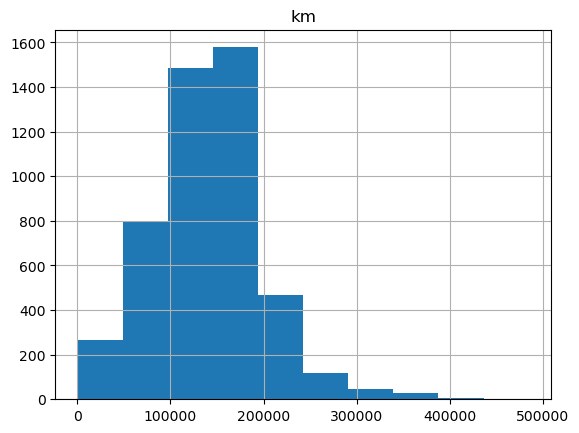

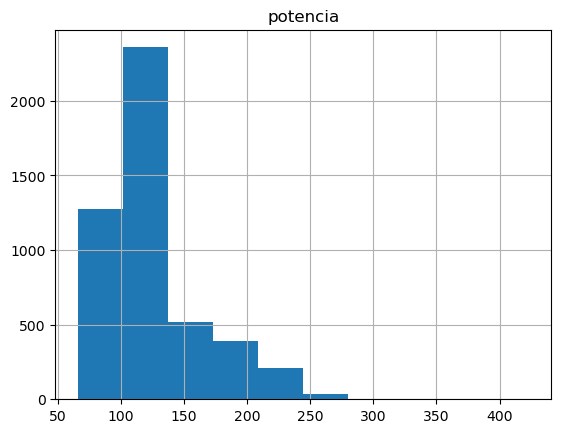

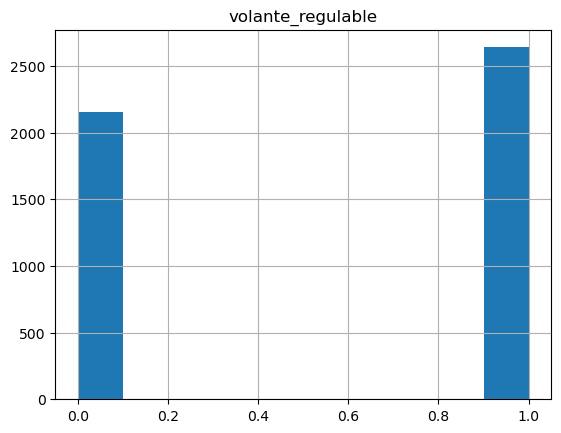

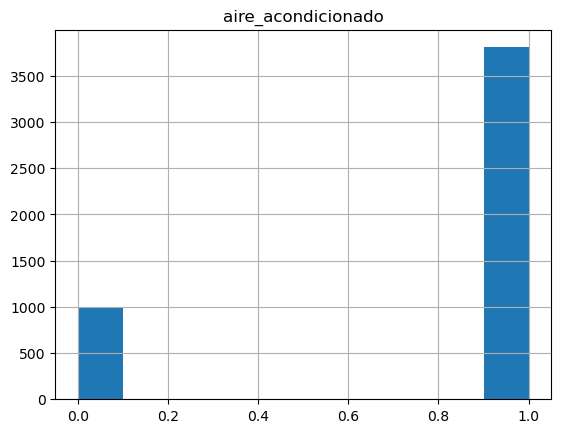

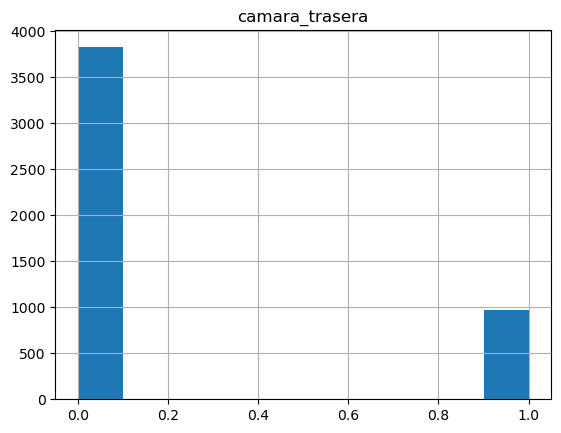

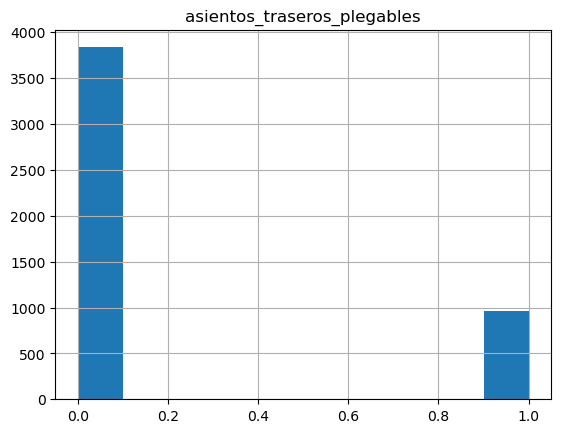

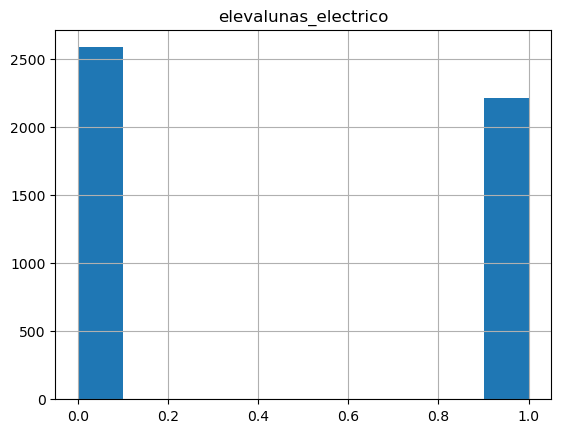

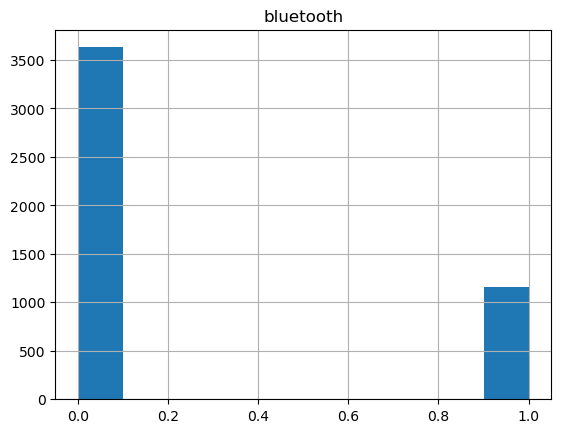

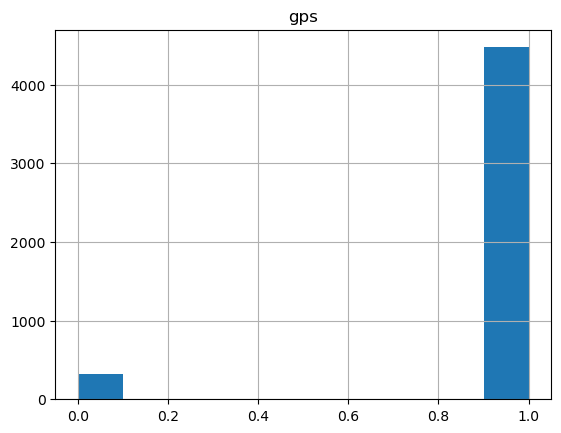

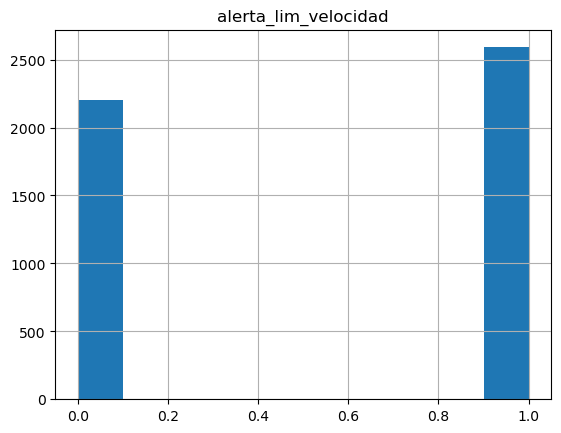

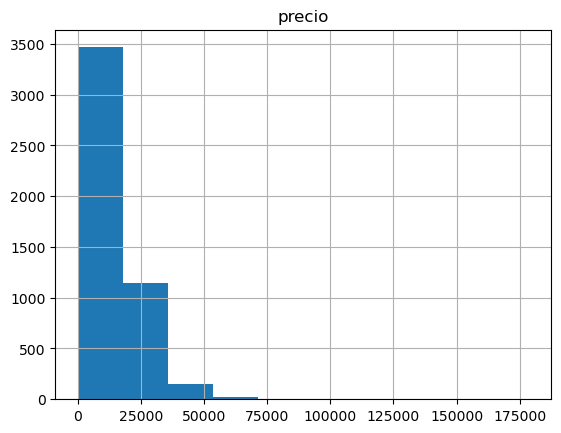

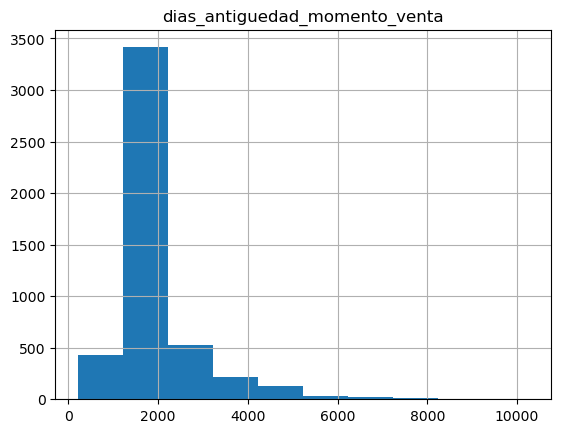

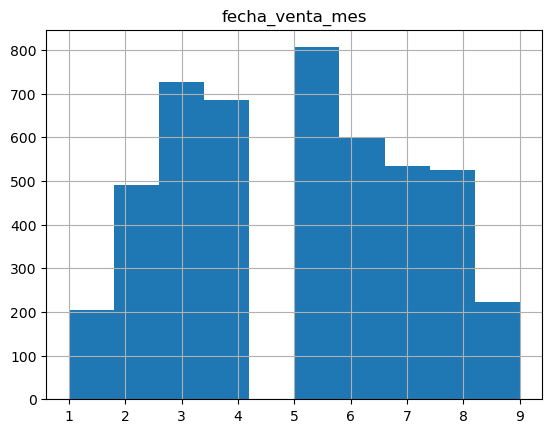

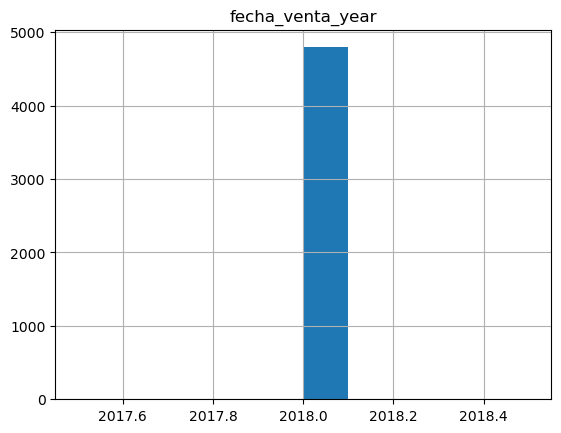

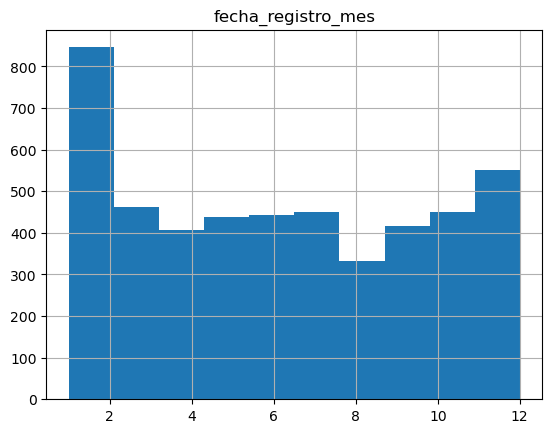

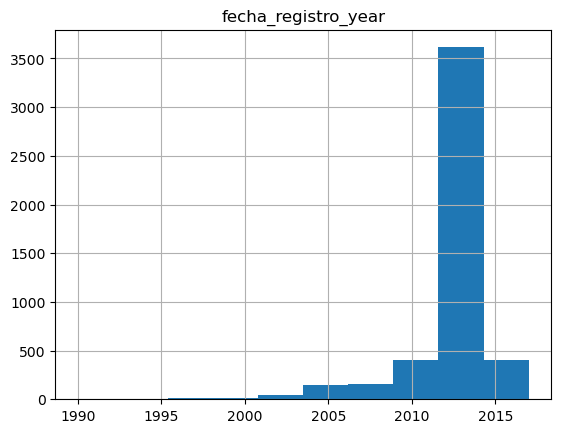

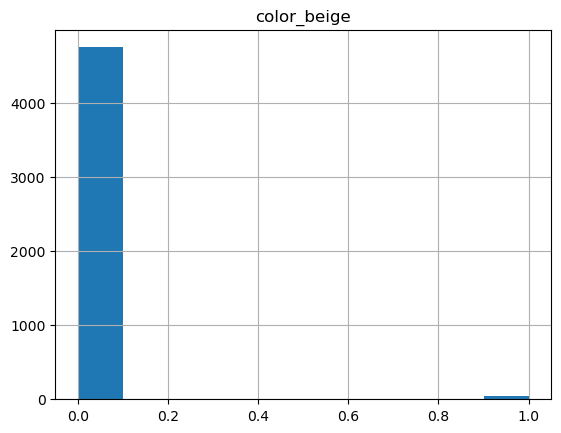

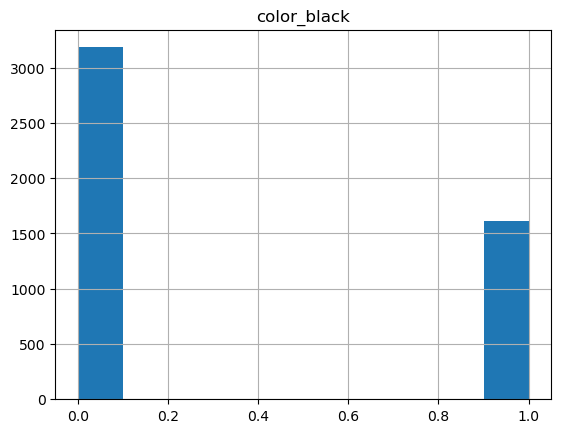

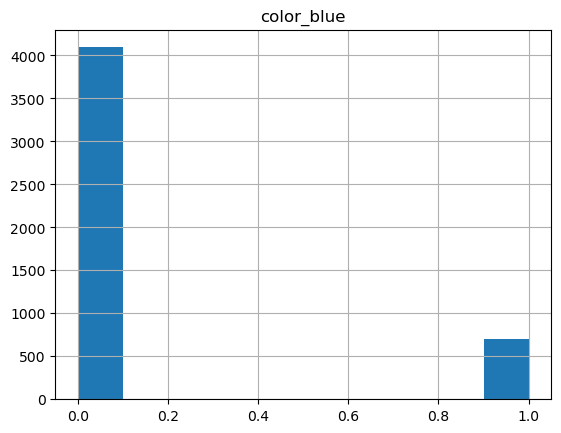

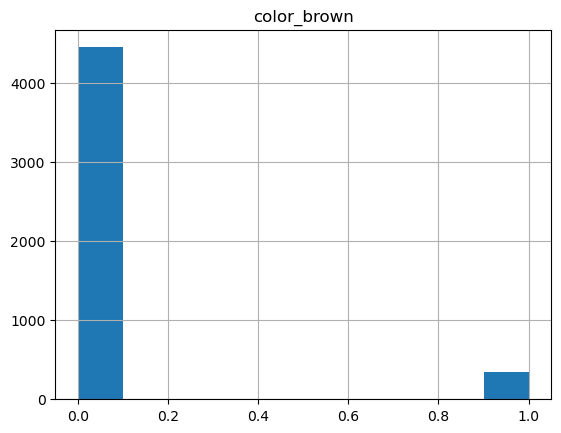

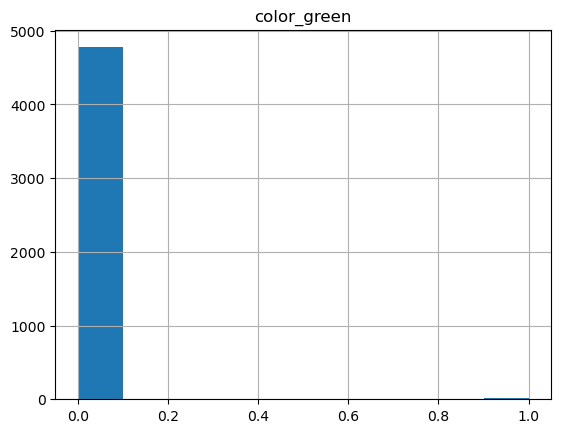

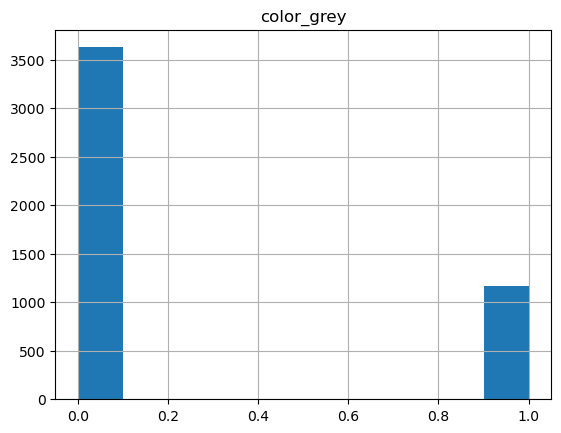

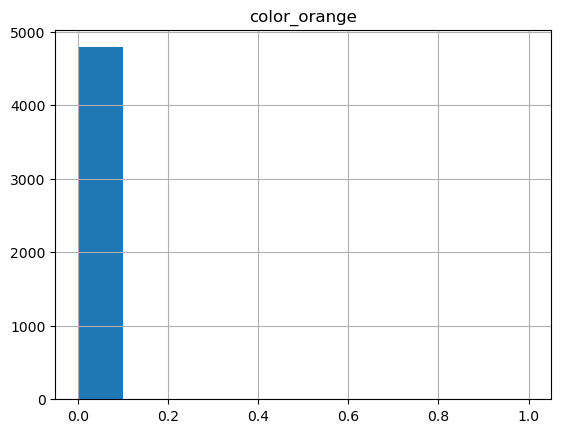

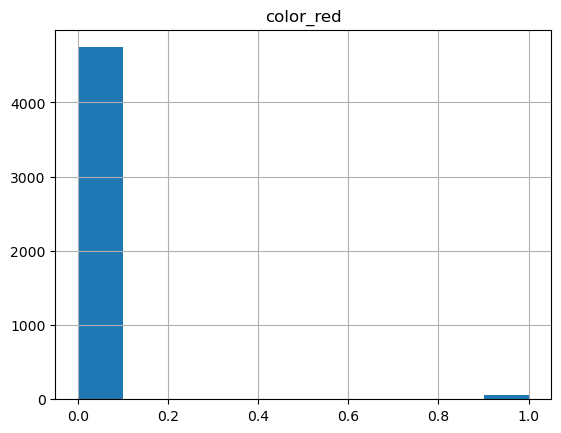

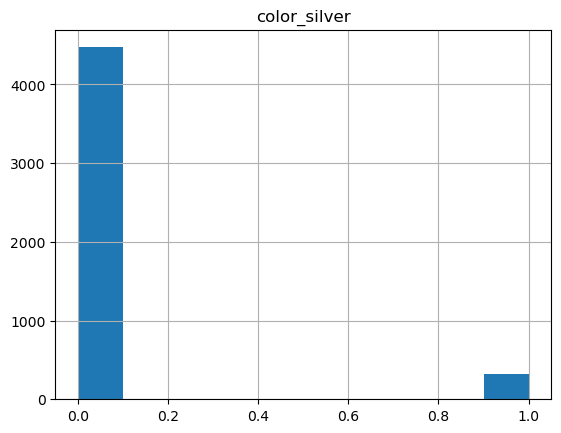

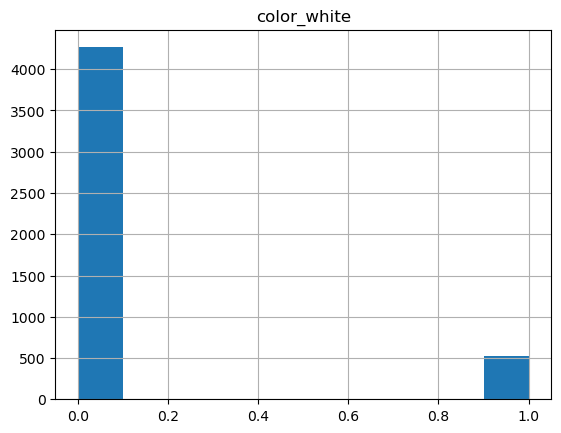

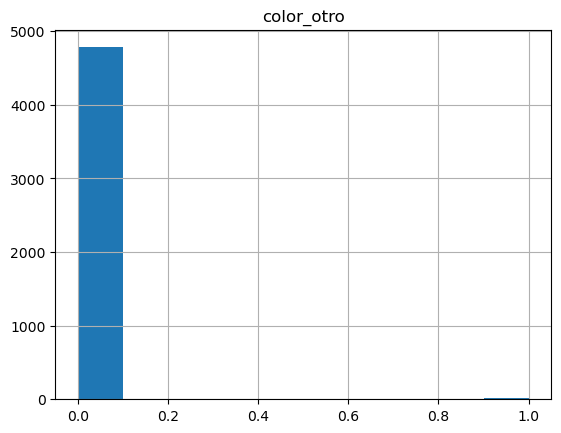

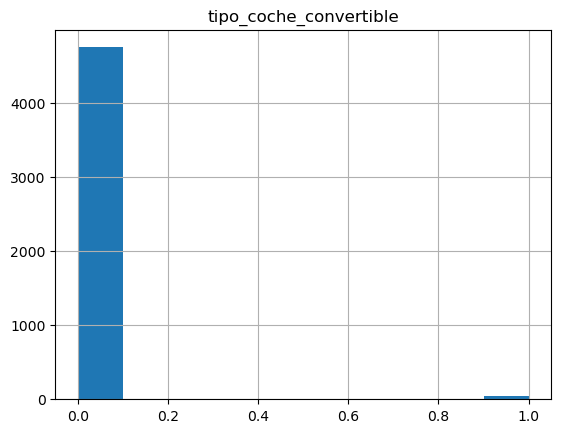

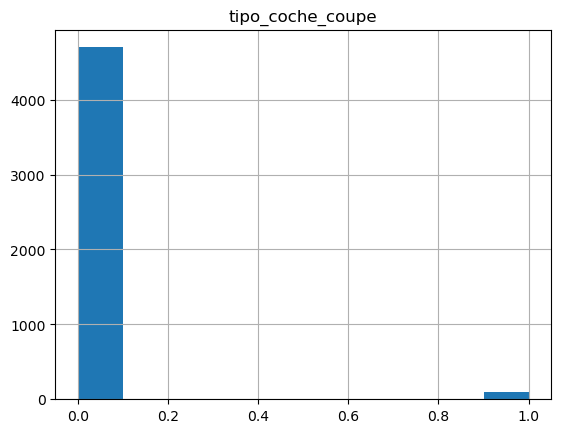

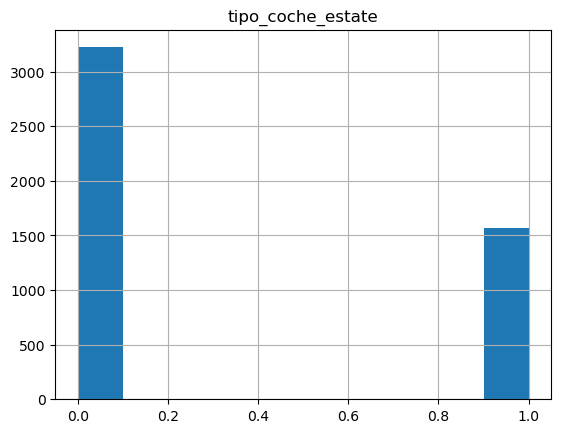

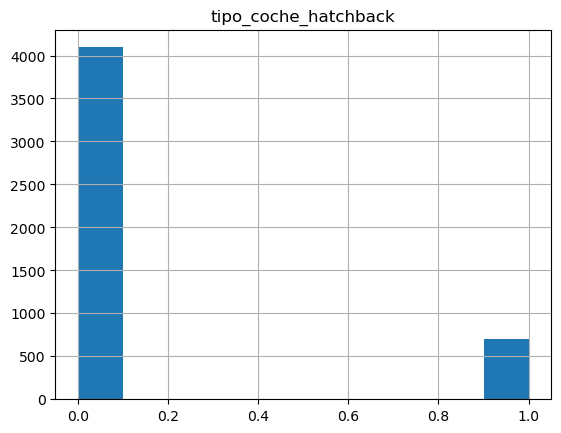

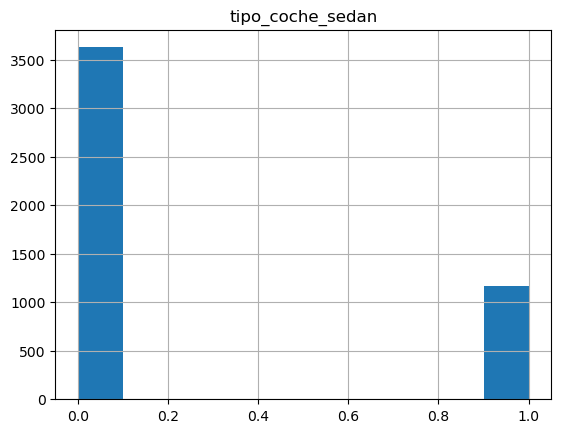

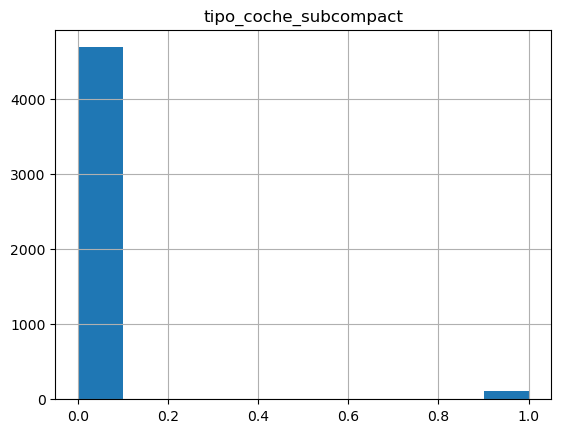

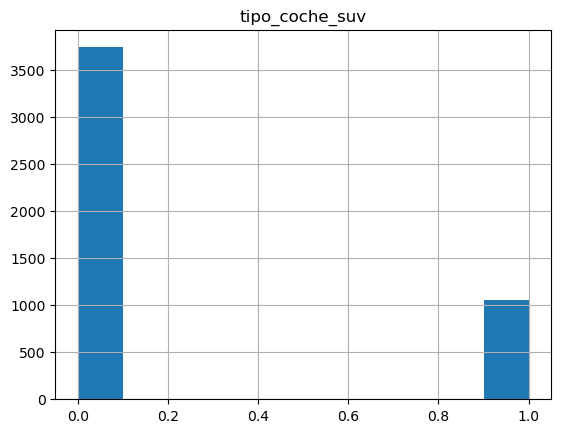

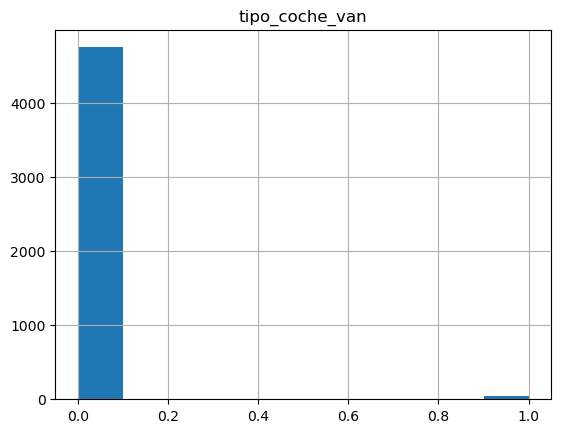

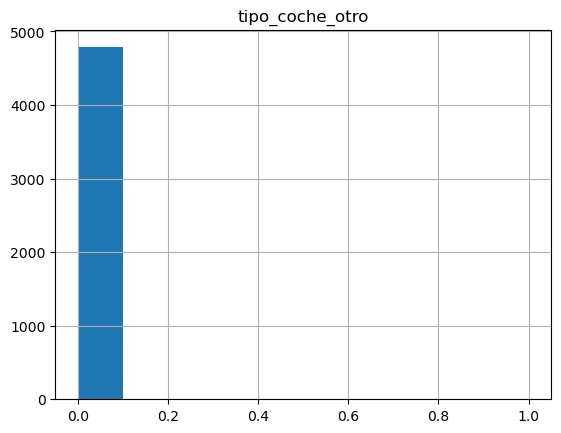

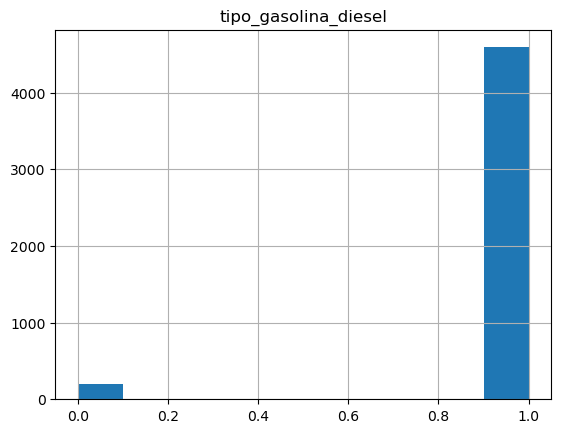

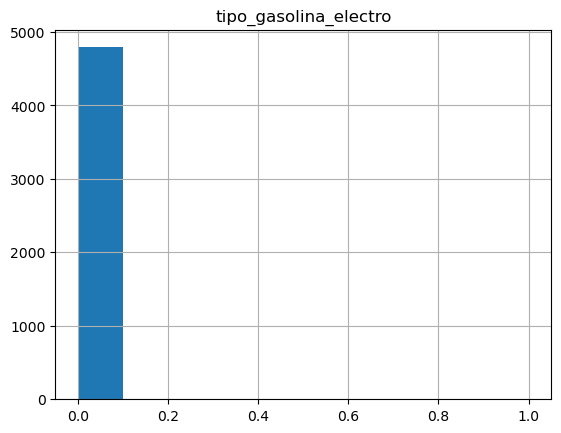

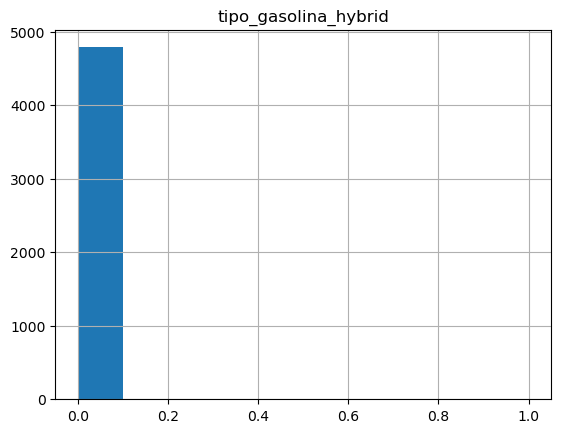

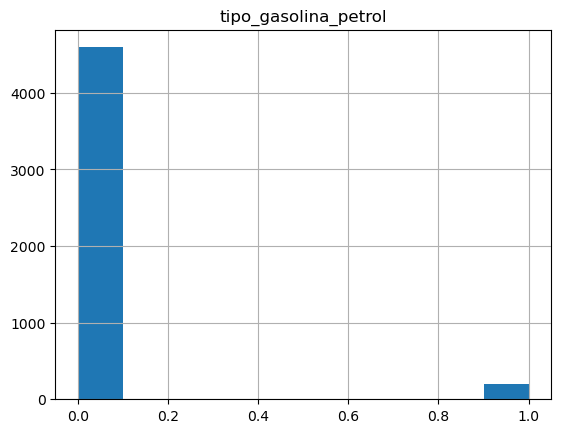

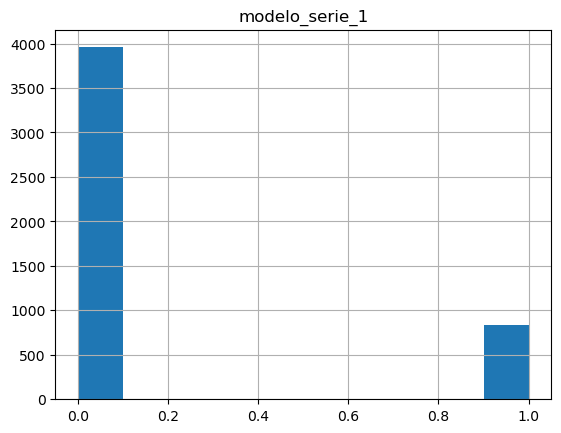

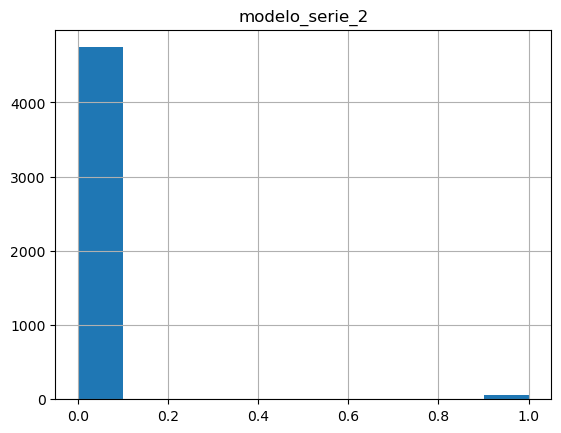

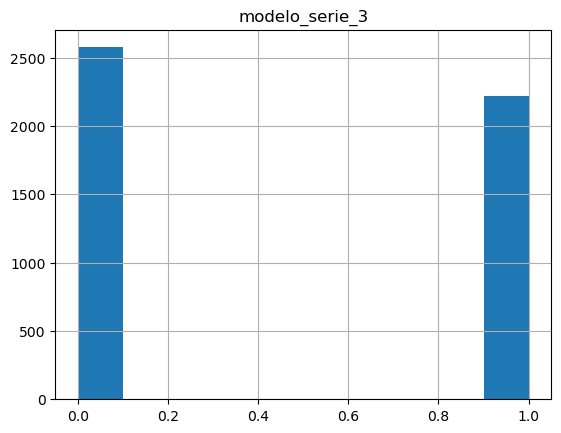

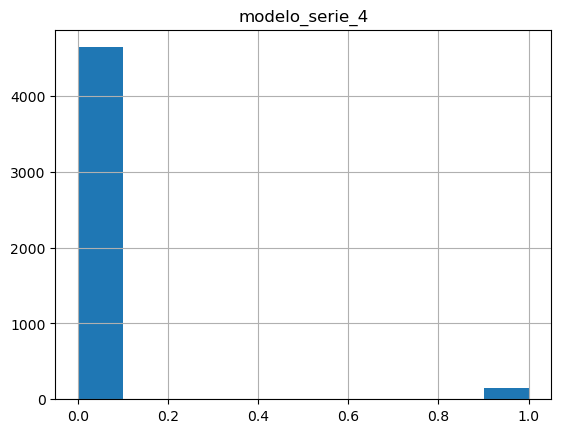

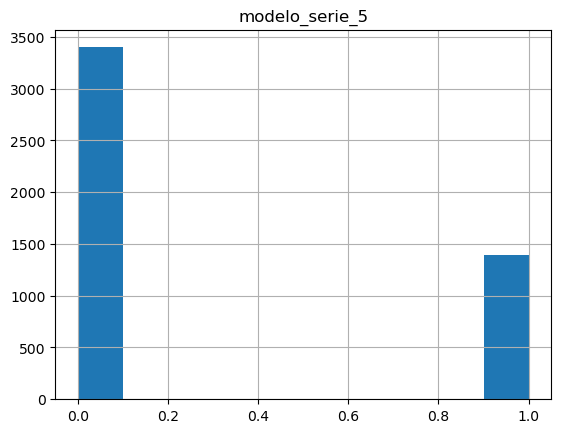

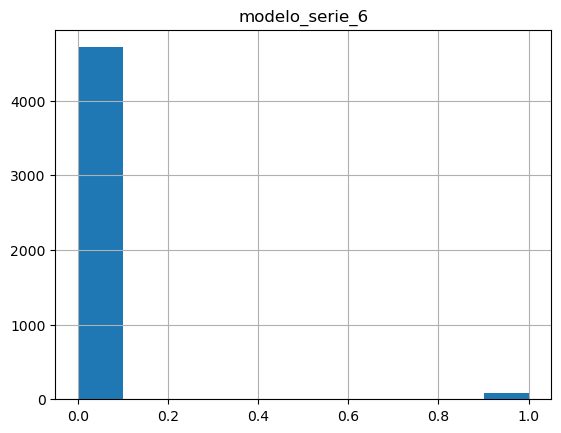

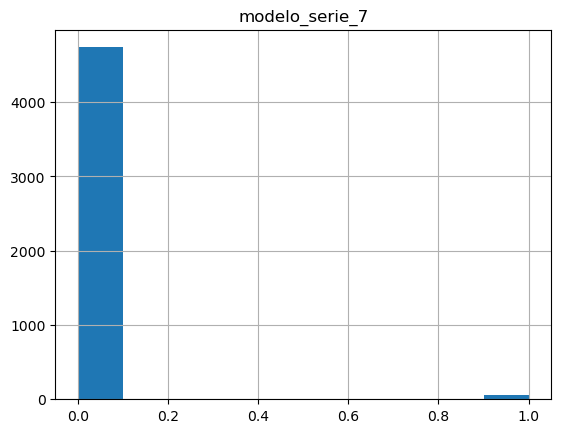

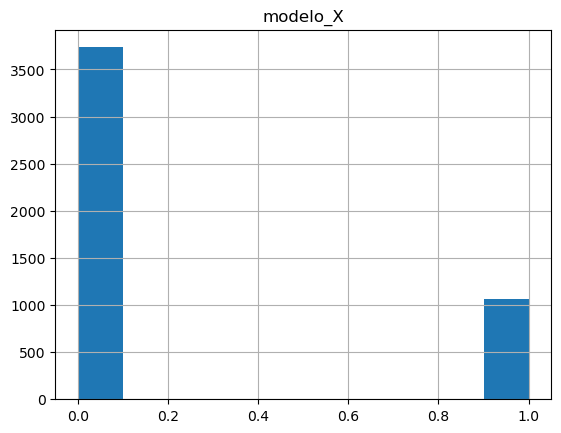

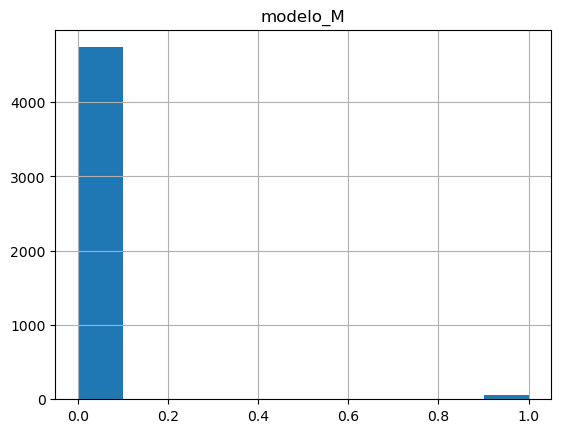

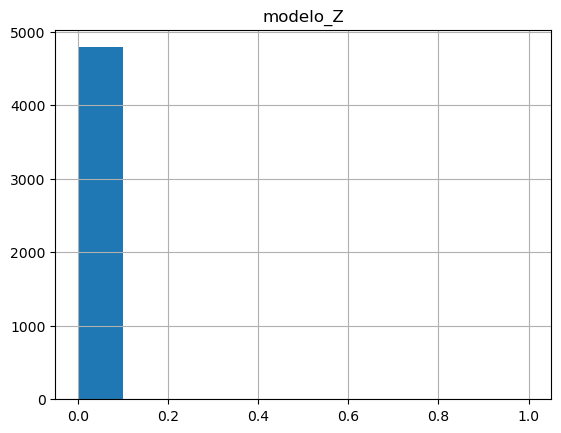

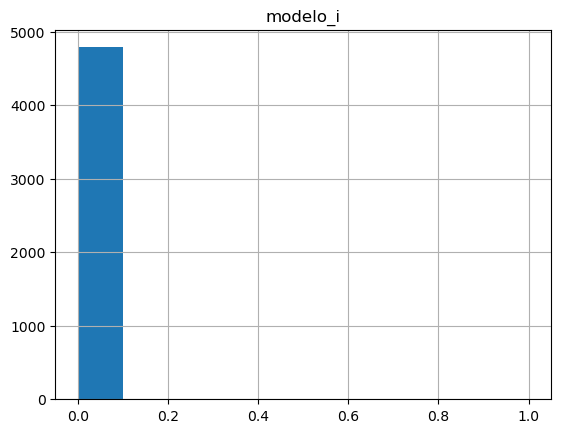

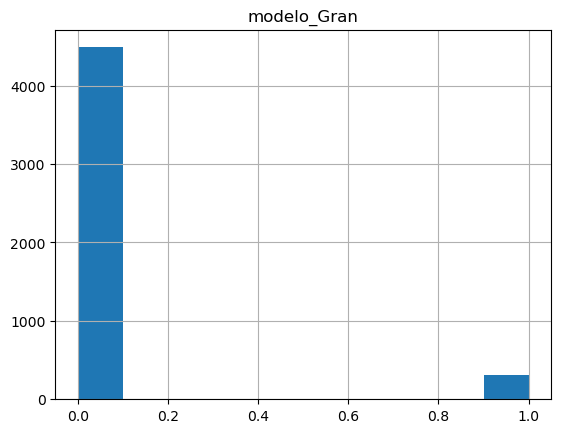

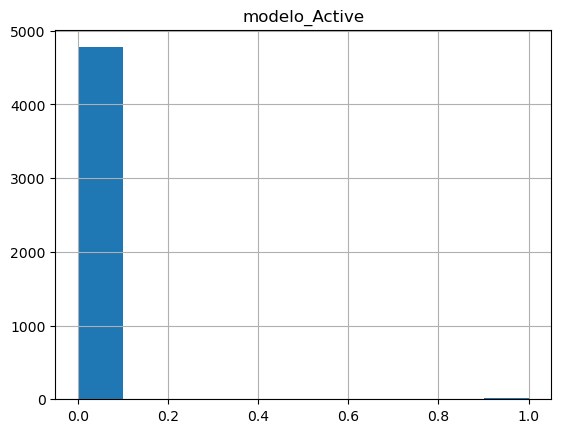

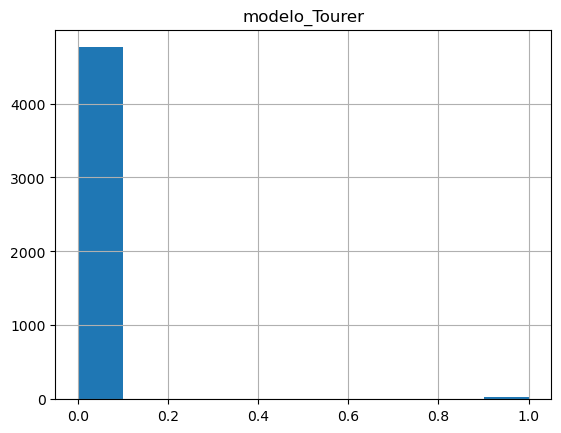

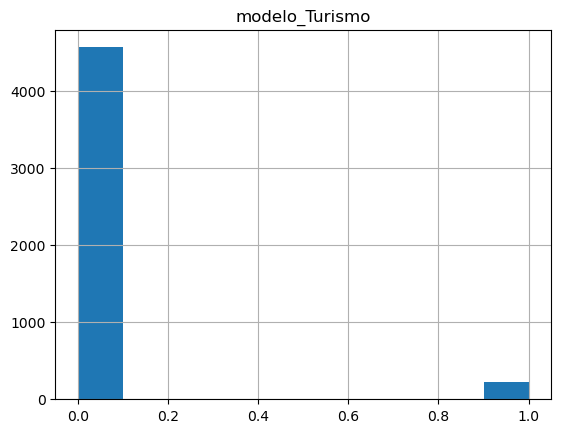

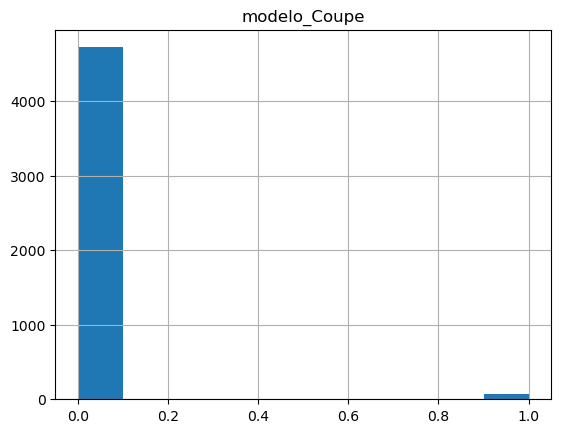

In [116]:
df_bmw4.info()

for i in df_bmw4:
    if  df_bmw4[i].dtype.kind=="f" or df_bmw4[i].dtype.kind=="i":
        df_bmw4.hist(column=i)

## 3.2. Estandarización
Se procede a estandarizar todas las columnas numéricas (menos el precio que es el target).

In [117]:
def minmaxTransformacion(dataframe, variable_transformar):
    minMaxResultado=MinMaxScaler()
    dataframe[variable_transformar]=minMaxResultado.fit_transform(dataframe[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [118]:
for i in lista_numericas:
  globals()['minMax_'+str(i)] = minmaxTransformacion(df_bmw5, i)

In [119]:
df_bmw5.head()

,modelo_original_name,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,...,modelo_serie_7,modelo_X,modelo_M,modelo_Z,modelo_i,modelo_Gran,modelo_Active,modelo_Tourer,modelo_Turismo,modelo_Coupe
0,118,0.289039,0.095238,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,M4,0.027787,0.703081,1,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,320,0.377621,0.151261,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,420,0.263476,0.193277,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,425,0.199573,0.263305,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [120]:
#Elimino la columna modelo_original_name
del(df_bmw5["modelo_original_name"])

In [121]:
#Elimino la columna fecha_venta_year porque no aporta nada teniendo ya calculada la de antiguedad
del(df_bmw5["fecha_venta_year"])

In [122]:
#creo la variable log_precio
df_bmw5["log_precio"] = np.log10(df_bmw5["precio"])
df_bmw5 = df_bmw5[['log_precio'] + [col for col in df_bmw5.columns if col != 'log_precio']]

In [123]:
#pongo la columna precio al inicio del dataframe
df_bmw5 = df_bmw5[['precio'] + [col for col in df_bmw5.columns if col != 'precio']]


## 3.3. Correlación
Finalmente hacemos un check de variables para que no haya correlación

Se observa alta correlación en 3 tipologias de casos:
1. Entre dias_antiguedad_momento_venta y fecha_registro_year pues la primera se ha calculado en base a la segunda (y la columna fecha_venta_year que ya he eliminado). **DECIDO NO BORRAR aún asumiendo que hay alta correlación entre ambas pues me parece información relevante a conservar**
2. Entre modelos y tipos de coche también hay algunos casos con alta correlación. Por ejemplo de los 1055 vehículos tipo Suv, todos son modelo X excepto 1. **DECIDO NO BORRAR aún asumiendo que hay alta correlación entre varias parejas de modelo-tipocoche o modelo-modelo pues me parece información relevante a conservar en todos los casos y ya he borrado los casos que no aportaban información en el apartado 2.2.**
3. Entre tipo_gasolina_diesel y tipo_gasolina_petrol también hay alta correlación pues son las 2 tipologías principales de combustible y cuando no es una, lo más probable es que sea la otra. **DECIDO NO BORRAR aún asumiendo que hay alta correlación entre ambas pues me parece información relevante a conservar**


In [124]:
corr = df_bmw5.corr()


In [125]:
corr.style.background_gradient(cmap='coolwarm')


,precio,log_precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,dias_antiguedad_momento_venta,fecha_venta_mes,fecha_registro_mes,fecha_registro_year,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,color_otro,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,tipo_coche_otro,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid,tipo_gasolina_petrol,modelo_serie_1,modelo_serie_2,modelo_serie_3,modelo_serie_4,modelo_serie_5,modelo_serie_6,modelo_serie_7,modelo_X,modelo_M,modelo_Z,modelo_i,modelo_Gran,modelo_Active,modelo_Tourer,modelo_Turismo,modelo_Coupe
precio,1.000000,0.822203,-0.412902,0.641215,0.268016,0.245766,0.252237,0.414235,0.261928,0.209964,-0.012226,0.447564,-0.447381,0.013008,-0.014628,0.451896,-0.000490,0.025636,-0.032938,-0.014939,-0.057950,-0.014155,0.011573,0.007943,-0.026999,0.061893,-0.016455,0.013936,0.107408,-0.204566,-0.114992,0.006539,-0.102839,0.327599,-0.013544,-0.034219,0.010318,0.013905,0.096687,-0.012136,-0.247992,0.018097,-0.241300,0.234926,0.258398,0.280556,0.147784,0.326121,0.278825,-0.024546,0.065960,0.110539,-0.004093,-0.002463,0.034764,0.163896
log_precio,0.822203,1.000000,-0.449219,0.524234,0.253508,0.351909,0.200588,0.359616,0.321043,0.206342,0.031515,0.438250,-0.643987,-0.002829,0.001012,0.646503,0.014507,0.035433,-0.053016,0.016262,-0.104718,-0.012930,0.016198,0.004848,-0.053552,0.068633,-0.014393,-0.003060,0.078136,-0.164256,-0.087961,0.017798,-0.108904,0.264507,-0.008317,-0.056830,0.092984,0.017493,0.055073,-0.095845,-0.217756,0.025055,-0.187816,0.189370,0.230299,0.185689,0.102678,0.262313,0.173054,-0.026364,0.039615,0.135218,0.009770,0.016098,0.076476,0.135166
km,-0.412902,-0.449219,1.000000,-0.046377,0.064866,0.015925,0.004296,-0.050144,0.051710,-0.028181,0.157388,-0.039270,0.508535,-0.002833,-0.018164,-0.508981,-0.018586,0.037603,-0.016488,-0.023577,0.057365,0.029506,-0.031225,-0.027344,0.020447,-0.069497,0.003950,-0.030310,-0.072122,0.183087,-0.113053,0.065952,-0.043634,-0.113084,-0.096265,0.021708,0.047792,-0.038328,-0.035611,-0.043330,-0.140609,-0.134612,0.084335,-0.177977,0.141638,-0.054434,0.002409,-0.114435,-0.060446,-0.021693,-0.047279,-0.063129,-0.048029,-0.093646,0.003558,-0.095463
potencia,0.641215,0.524234,-0.046377,1.000000,0.327563,0.201086,0.313457,0.449383,0.342218,0.232032,0.006455,0.491722,-0.083989,-0.029440,0.000567,0.082220,-0.012863,0.038784,-0.018206,-0.068948,-0.013483,0.003966,0.011472,-0.005879,0.013996,0.011201,-0.014112,0.035545,0.127841,-0.052298,-0.224763,0.033101,-0.158158,0.237804,-0.054526,-0.029268,-0.123109,-0.024029,0.042480,0.127005,-0.345095,-0.039139,-0.248701,0.091231,0.398258,0.318496,0.193254,0.237983,0.337651,0.000106,-0.029097,0.034471,-0.026353,-0.055386,-0.014278,0.115866
volante_regulable,0.268016,0.253508,0.064866,0.327563,1.000000,0.308570,0.253475,0.231844,0.280122,0.132607,0.241208,0.225651,0.074223,0.079210,-0.034120,-0.065199,-0.016295,0.018502,0.004835,0.043726,0.014314,0.053235,0.008254,-0.033048,-0.024880,-0.108183,-0.013497,0.054495,0.029140,-0.002396,-0.151450,0.054636,-0.107375,0.104281,-0.052728,-0.009263,0.006761,0.005834,0.016382,-0.007541,-0.266763,-0.063301,-0.163139,0.078943,0.331246,0.111910,0.092438,0.101913,0.076543,0.031976,0.001594,0.019710,-0.026114,-0.041451,-0.011556,0.073947
aire_acondicionado,0.245766,0.351909,0.015925,0.201086,0.308570,1.000000,0.149864,0.149749,0.285637,0.135323,0.369262,0.225086,-0.232718,0.011506,0.012034,0.233251,0.013676,0.034595,-0.004514,0.050243,-0.027786,0.025082,-0.011158,-0.052799,-0.044247,-0.069695,0.015183,-0.045137,-0.034947,0.099612,-0.086727,0.051776,-0.146655,-0.010951,-0.003131,-0.049423,0.093500,0.012741,0.008178,-0.095769,-0.264960,-0.001465,-0.037398,0.016694,0.228521,0.050741,0.054347,-0.013642,0.029

In [126]:
high_corr = corr[(corr > 0.7) | (corr < -0.7)]

In [127]:
high_corr.style.background_gradient(cmap='coolwarm')


,precio,log_precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,dias_antiguedad_momento_venta,fecha_venta_mes,fecha_registro_mes,fecha_registro_year,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,color_otro,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,tipo_coche_otro,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid,tipo_gasolina_petrol,modelo_serie_1,modelo_serie_2,modelo_serie_3,modelo_serie_4,modelo_serie_5,modelo_serie_6,modelo_serie_7,modelo_X,modelo_M,modelo_Z,modelo_i,modelo_Gran,modelo_Active,modelo_Tourer,modelo_Turismo,modelo_Coupe
precio,1.000000,0.822203,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
log_precio,0.822203,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
km,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
potencia,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
volante_regulable,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
aire_acondicionado,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
camara_trasera,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
asientos_traseros_plegables,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
elevalunas_electrico,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bluetooth,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [128]:
#Solamente 1 vehiculo tipo Suv no es modelo X, los otros 1054 sí
df_bmw5[(df_bmw5["tipo_coche_suv"]==1) & (df_bmw5["modelo_X"]==0)]

,precio,log_precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,...,modelo_serie_7,modelo_X,modelo_M,modelo_Z,modelo_i,modelo_Gran,modelo_Active,modelo_Tourer,modelo_Turismo,modelo_Coupe
4519,17700.0,4.247973,0.349951,0.193277,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [129]:
len(df_bmw5[(df_bmw5["tipo_coche_suv"]==1)])

1055

In [130]:
len(df_bmw5[(df_bmw5["tipo_coche_suv"]==1) & (df_bmw5["modelo_X"]==1)])

1054

In [131]:
#Solamente 8 vehiculos tipo van no son modelo Tourer, los otros 33 sí
df_bmw5[(df_bmw5["tipo_coche_van"]==1) & (df_bmw5["modelo_Tourer"]==0)]

,precio,log_precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,...,modelo_serie_7,modelo_X,modelo_M,modelo_Z,modelo_i,modelo_Gran,modelo_Active,modelo_Tourer,modelo_Turismo,modelo_Coupe
4754,11100.0,4.045323,0.249317,0.123249,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4755,4800.0,3.681241,0.063211,0.053221,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4758,800.0,2.903090,0.243416,0.123249,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4763,6000.0,3.778151,0.248633,0.123249,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4765,15600.0,4.193125,0.150199,0.193277,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4766,18600.0,4.269513,0.282124,0.193277,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
4768,22800.0,4.357935,0.199691,0.193277,0,1,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0
4769,1300.0,3.113943,0.226305,0.179272,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [132]:
len(df_bmw5[(df_bmw5["tipo_coche_van"]==1) & (df_bmw5["modelo_Tourer"]==1)])

33

### 3.3.1. Gráficos extra para observar relación entre variables

<Axes: xlabel='km', ylabel='precio'>

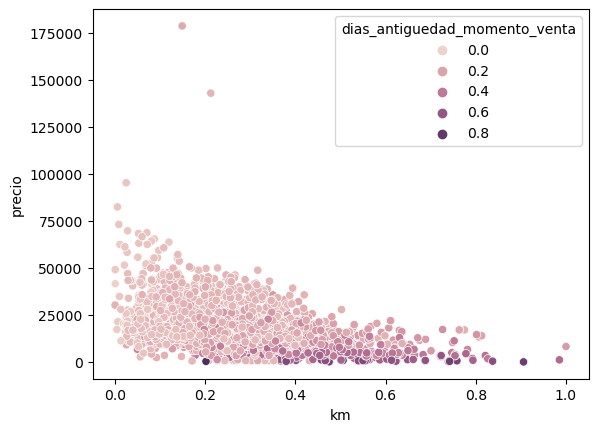

In [133]:
#Se observa que a menos antiguedad o menos km , más precio
sns.scatterplot(x="km", y="precio", hue="dias_antiguedad_momento_venta", data=df_bmw5)


In [134]:
len(df_bmw5.columns)

56

# 4. Conclusiones finales
He terminado con **56 columnas** y **4794 registros**

**ANÁLISIS DEL DATA FRAME**

**Tipología**
- Modelos más vendidos
    - Un 46% de los vehículos vendidos son del modelo Serie 3, y un 29% son del modelo Serie 5
    - Además, un 22% de los vehículos vendidos son del modelo X (todoterrenos)
    (*importante remarcar que un mismo vehículo puede ser de serie 3 y todoterreno*)
- Tipologías más vendidas son: Estate (32%), Sedan (24%) y Suv (22%)
- Los extra más usados son: gps (93%), aire acondicionado (79%) y volante regulable (55%)
- los colores más usados son: black (33%) y grey (24%)
- El 95% de los coches usan gasolina tipo diesel

**Estado de los vehículos**
- 140.000km medios 
- 129 potencia media
- los años en que más coches se registraron son 2013 y 2014 (siendo un x% del total de la base de datos)
- Siendo 1984 la media de dias de antiguedad a la fecha de la venta (5,4 años)

**Información sobre la venta**
- Todas las ventas se realizaron el año 2018
- Los meses de más ventas son mayo, marzo y abril (*aunque no se tienen datos de ventas para los meses octubre, noviembre, diciembre*)
- No se tiene constancia del día de la semana en que se venden los coches pues todos los registros cuentan como venta en el primer dia del mes

**DATAFRAME LISTO PARA APLICAR MODELO DE MACHINE LEARNING**
- Se termina con un DataFrame con algunas observaciones de alta correlación las cuales se justifica no eliminar pues son altas correlaciones lógicas y borrándolas se perdería información
- Se agrega una nueva columna log_precio para apoyar en modelo en caso de ser necesario